In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/DATA SCIENTIST/P5')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import adjusted_rand_score

from sklearn.mixture import GaussianMixture as gmm
from sklearn.model_selection import StratifiedKFold

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Chargement des data set

In [ ]:
set_time_1_5 = pd.read_csv('P5_set_time_1_5.csv')
set_time_2_5 = pd.read_csv('P5_set_time_2_5.csv')
set_time_3_5 = pd.read_csv('P5_set_time_3_5.csv')
set_time_1_3_2_3 = pd.read_csv('P5_set_time_1_3_2_3.csv')
set_time_2_3_3_3 = pd.read_csv('P5_set_time_2_3_3_3.csv')
global_data=pd.read_csv('P5_global_data.csv')

In [ ]:
set_time_1_5=set_time_1_5.set_index('customer_unique_id')
set_time_2_5=set_time_2_5.set_index('customer_unique_id')
set_time_3_5=set_time_3_5.set_index('customer_unique_id')
set_time_1_3_2_3=set_time_1_3_2_3.set_index('customer_unique_id')
set_time_2_3_3_3=set_time_2_3_3_3.set_index('customer_unique_id')
global_data =global_data.set_index('customer_unique_id')

In [ ]:
print(set_time_1_5.shape)
print(set_time_2_5.shape)
print(set_time_3_5.shape)
print(set_time_1_3_2_3.shape)
print(set_time_2_3_3_3.shape)
print(global_data.shape)

(8310, 31)
(34144, 31)
(51243, 31)
(42423, 31)
(85109, 31)
(93318, 31)


#Encodage

In [ ]:
def encodage_OHE (frame):
  X = frame.copy()
  X=X.reset_index(drop=True)
  categorical_columns = X.select_dtypes(['category','object']).columns
  numerical_columns = X.select_dtypes(['int64','float64']).columns

  ohe = OneHotEncoder(sparse=False)
  ss = StandardScaler()

  X[numerical_columns] = ss.fit_transform(X[numerical_columns])
  ohe.fit(X[categorical_columns])
  
  X = pd.merge(X[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(X[categorical_columns])),left_index = True, right_index = True)
  X=X.set_index(frame.index)


  #Vérification des features catégorielles
  list_catego_enc= ['x0_activities','x0_appliances','x0_construction','x0_electronics','x0_fashion',
                    'x0_food','x0_garden_pets','x0_health_beauty','x0_home','x0_office','x0_other',
                    'x1_boleto','x1_credit_card','x1_debit_card','x1_not_defined','x1_voucher']   

  for i in list_catego_enc :
    if i not in X.columns:
      X[i] = 0.0
      
  return X

In [ ]:
set_1_5_enc=encodage_OHE (set_time_1_5)
set_time_2_5_enc=encodage_OHE (set_time_2_5)
set_time_3_5_enc=encodage_OHE (set_time_3_5)
set_time_1_3_2_3_enc=encodage_OHE (set_time_1_3_2_3)
set_time_2_3_3_3_enc=encodage_OHE (set_time_2_3_3_3)
global_data_enc=encodage_OHE (global_data)

In [ ]:
print(set_1_5_enc.shape)
print(set_time_2_5_enc.shape)
print(set_time_3_5_enc.shape)
print(set_time_1_3_2_3_enc.shape)
print(set_time_2_3_3_3_enc.shape)
print(global_data_enc.shape)

(8310, 45)
(34144, 45)
(51243, 45)
(42423, 45)
(85109, 45)
(93318, 45)


In [ ]:
set_1_5_enc.dtypes

distance_cust_sell     float64
nb_com_moy             float64
nb_pdt_com_moy         float64
montant_moy            float64
note_moy               float64
heure_moy_achat        float64
jour_moy_achat         float64
delai_dernier_achat    float64
delais_com_min_max     float64
delai_livrai_moy       float64
health_beauty          float64
fashion                float64
activities             float64
home                   float64
other                  float64
electronics            float64
appliances             float64
construction           float64
office                 float64
garden_pets            float64
food                   float64
not_defined            float64
boleto                 float64
credit_card            float64
debit_card             float64
voucher                float64
zip_code               float64
geo_customer_lat       float64
geo_customer_lng       float64
x0_activities          float64
x0_appliances          float64
x0_construction        float64
x0_elect

#Sélection du modèle de culstering sur le 1er set

In [ ]:
set_1_5_enc.shape

(8310, 45)

## Kmeans (1_5)

In [ ]:
inerti_1_5 = {}
dic_kmeans_1_5 = {}
for i in range(1,35,1):
    kmeans = KMeans(n_clusters=i,
                   verbose=1,
                   random_state=0,
                   n_jobs=-1).fit(set_1_5_enc)

    inerti_1_5[i] = kmeans.inertia_
    dic_kmeans_1_5[i] = kmeans

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


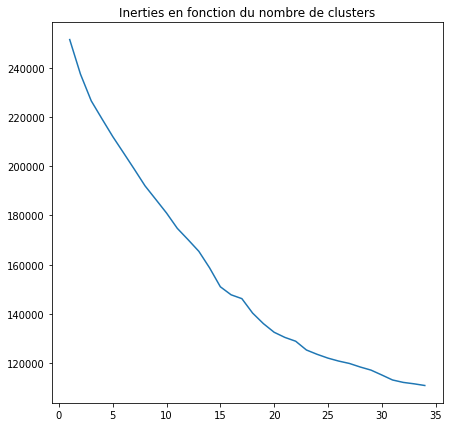

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Inerties en fonction du nombre de clusters')
sns.lineplot(list(inerti_1_5.keys()),list(inerti_1_5.values()))

In [ ]:
### trop de cluster pour une application marketing

###Coef de Silhouette

In [ ]:
coef_sil_kmeans_1_5 = {}
for i in range(2,16):
    coef_sil_kmeans_1_5[i] = silhouette_score(X = set_1_5_enc, labels= list(dic_kmeans_1_5[(i)].labels_))

In [ ]:
coef_sil_kmeans_1_5

{2: 0.17758268168267943,
 3: 0.11442074531546412,
 4: 0.09162349148795629,
 5: 0.06806811860811733,
 6: 0.06873435185729326,
 7: 0.07930998362265534,
 8: 0.09209315940308331,
 9: 0.10159804876152607,
 10: 0.1304294540448818,
 11: 0.130289576839335,
 12: 0.13120009894618834,
 13: 0.1295571698537294,
 14: 0.12984692272268775,
 15: 0.15603191690749604}

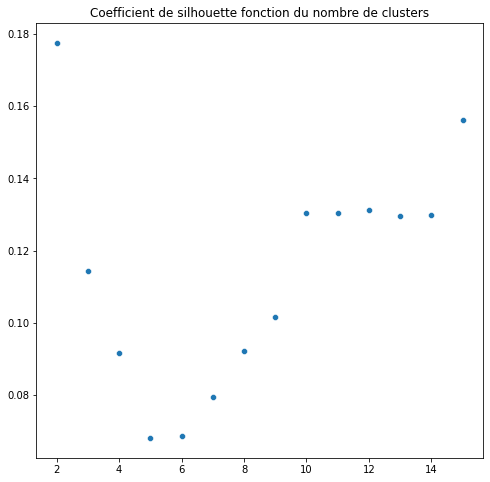

In [ ]:
plt.figure(figsize=(8,8)),
plt.title('Coefficient de silhouette fonction du nombre de clusters')
sns.scatterplot(x = list(coef_sil_kmeans_1_5.keys()),y = list(coef_sil_kmeans_1_5.values()))
plt.show()

### Indice de Davies - Bouldin

In [ ]:
Ind_DB_kmeans_1_5 = {}
for i in range(2,16):
    Ind_DB_kmeans_1_5[i] = davies_bouldin_score(X = set_1_5_enc,
                                             labels= list(dic_kmeans_1_5[i].labels_))

In [ ]:
Ind_DB_kmeans_1_5

{2: 2.5584479342011943,
 3: 2.794440302402356,
 4: 2.7461830248122667,
 5: 2.1716347366888,
 6: 1.9371505689119761,
 7: 2.210841238731399,
 8: 2.086310612843895,
 9: 2.0375652278317964,
 10: 1.973567877385411,
 11: 1.677171567676506,
 12: 1.7321039065398856,
 13: 1.8908969190831972,
 14: 1.7438489135373563,
 15: 1.5504898508808072}

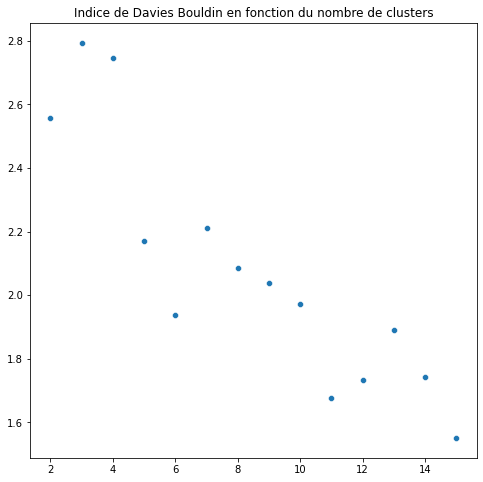

In [ ]:
plt.figure(figsize=(8,8)),
plt.title('Indice de Davies Bouldin en fonction du nombre de clusters')
sns.scatterplot(x = list(Ind_DB_kmeans_1_5.keys()),y = list(Ind_DB_kmeans_1_5.values()))
plt.show()

In [ ]:
### Coef de sikhouette max et indice de DB min pour nb de cluster = 11

###TSNE

In [ ]:
tsne_1_5 = TSNE(n_components=2)
set_1_5_tsne = tsne_1_5.fit_transform(set_1_5_enc.copy())

nb cluster = 4


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


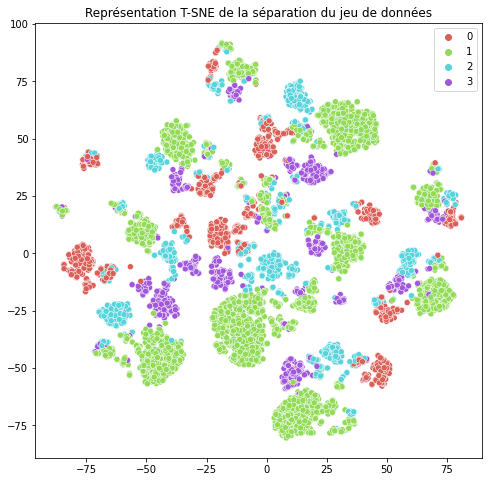

nb cluster = 5


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


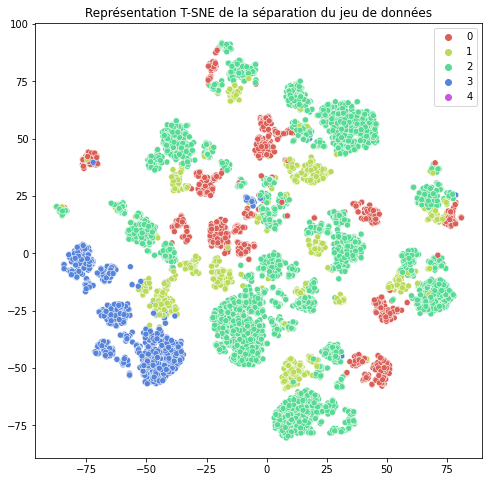

nb cluster = 6


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


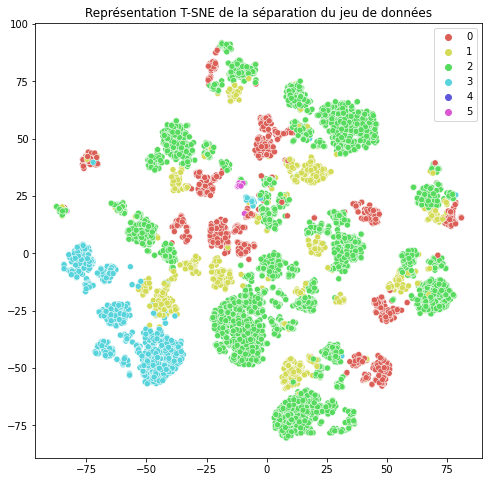

nb cluster = 7


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


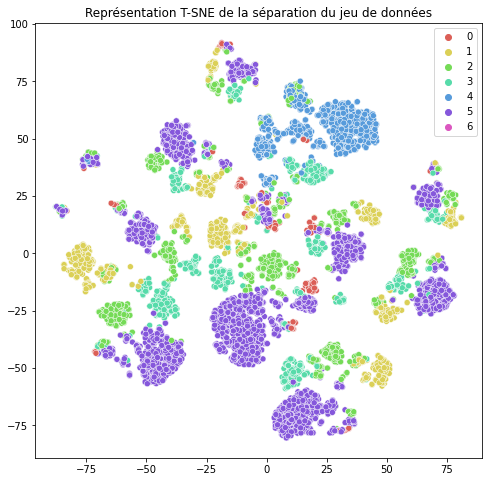

nb cluster = 8


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


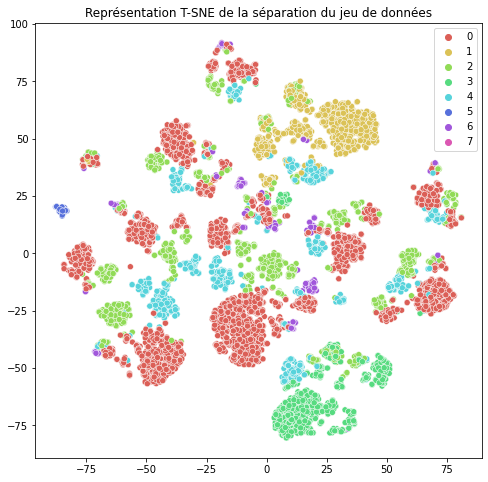

nb cluster = 9


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


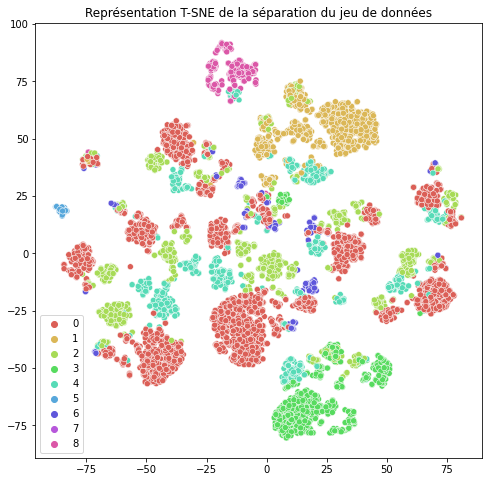

nb cluster = 10


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


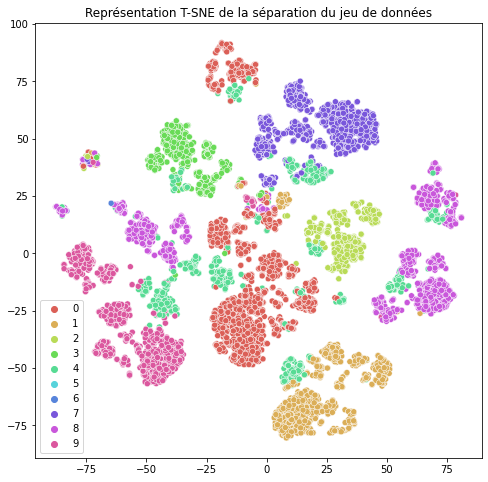

nb cluster = 11


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


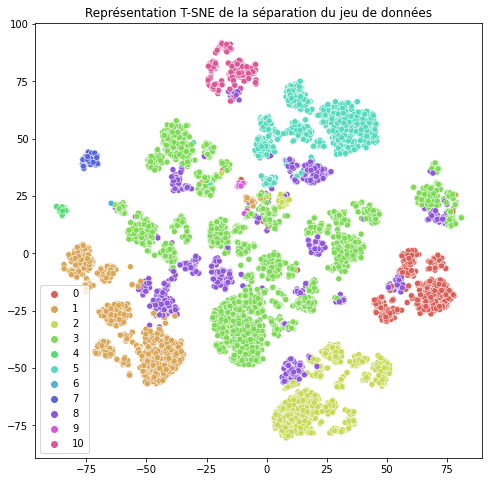

In [ ]:
for i in range(4,12,1):
  print('nb cluster =', i)
  plt.figure(figsize=(8,8))
  plt.title('Représentation T-SNE de la séparation du jeu de données')
  sns.scatterplot(set_1_5_tsne[:,0],set_1_5_tsne[:,1],hue=dic_kmeans_1_5[i].labels_,
                  legend='full', palette=sns.color_palette("hls",i))
  plt.show()

For n_clusters = 4 The average silhouette_score is : 0.09162349148795629
For n_clusters = 5 The average silhouette_score is : 0.06806811860811733
For n_clusters = 6 The average silhouette_score is : 0.06873435185729326
For n_clusters = 7 The average silhouette_score is : 0.07930998362265534
For n_clusters = 8 The average silhouette_score is : 0.09209315940308331
For n_clusters = 9 The average silhouette_score is : 0.10159804876152607
For n_clusters = 10 The average silhouette_score is : 0.1304294540448818
For n_clusters = 11 The average silhouette_score is : 0.130289576839335
For n_clusters = 12 The average silhouette_score is : 0.13120009894618834


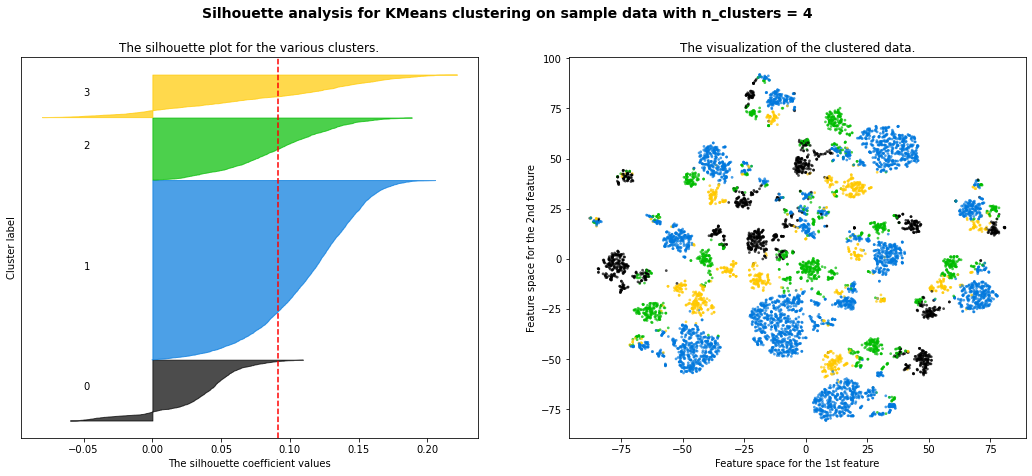

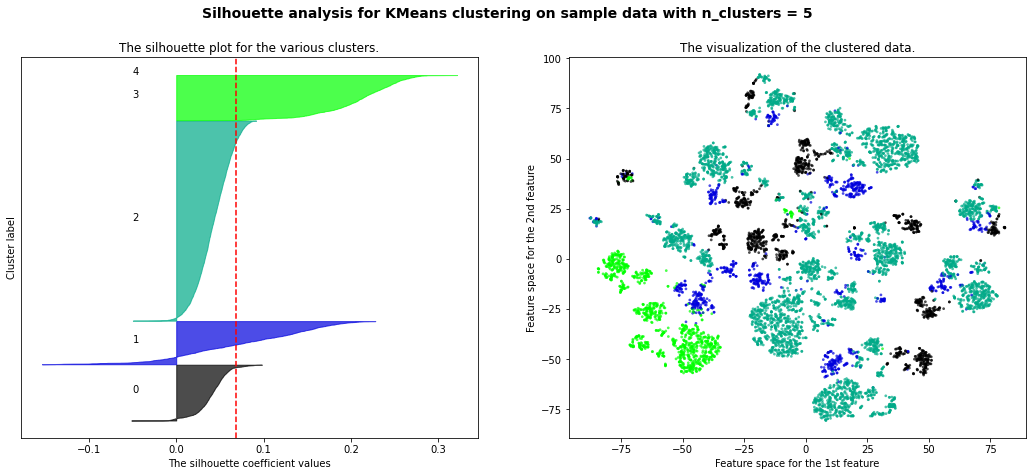

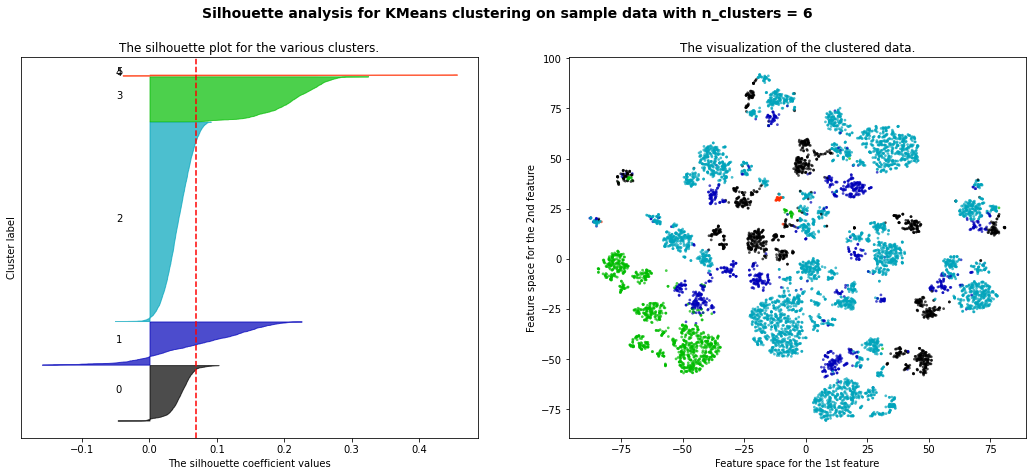

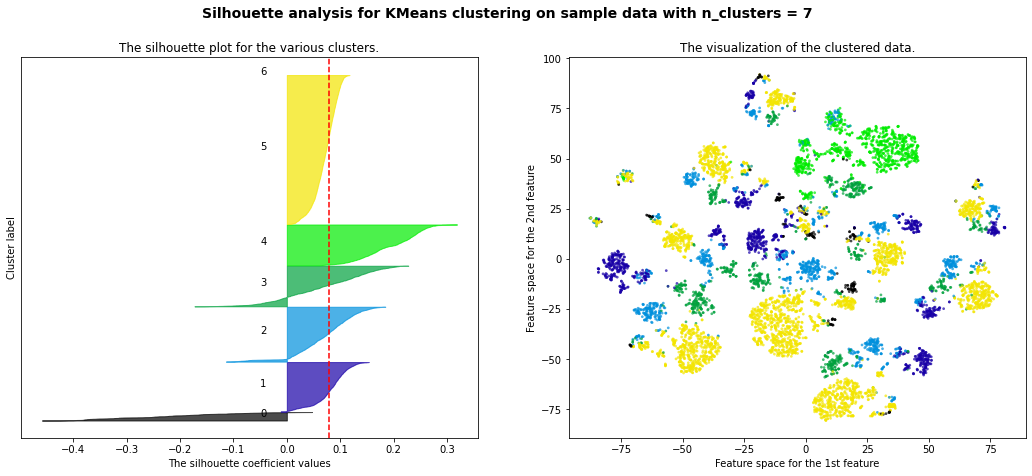

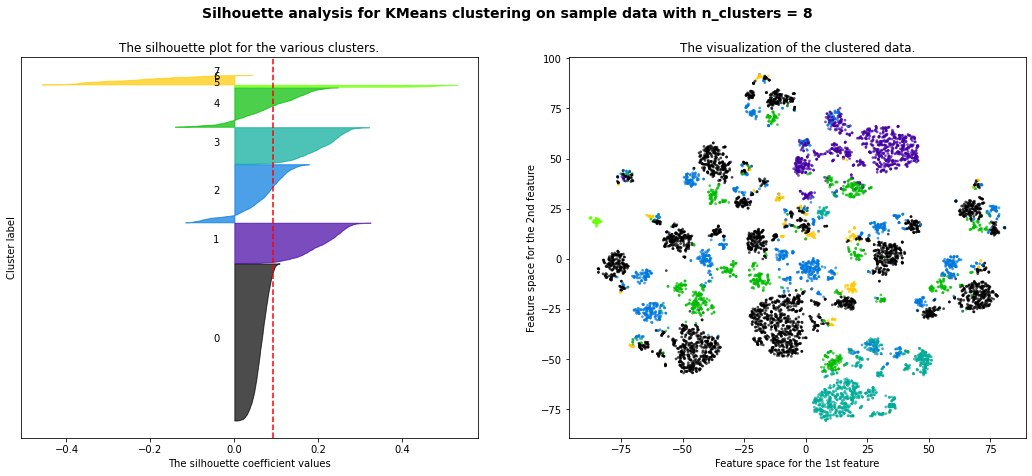

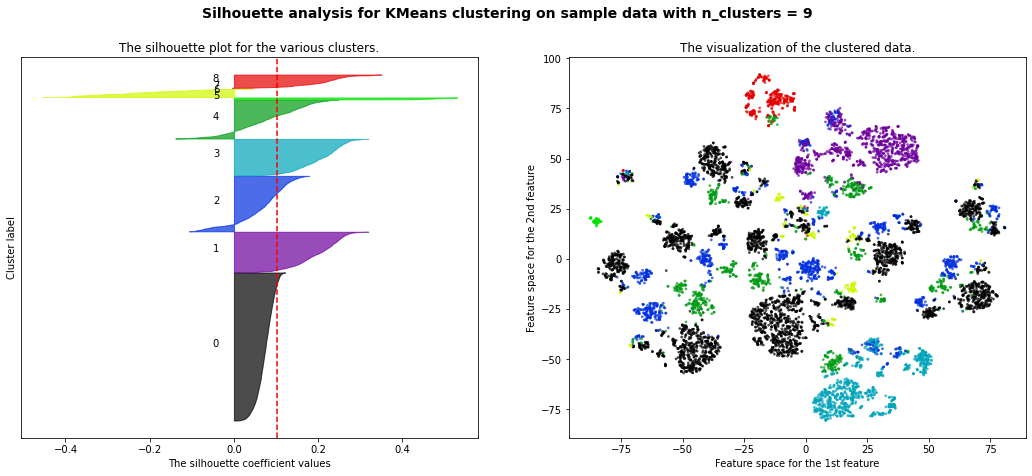

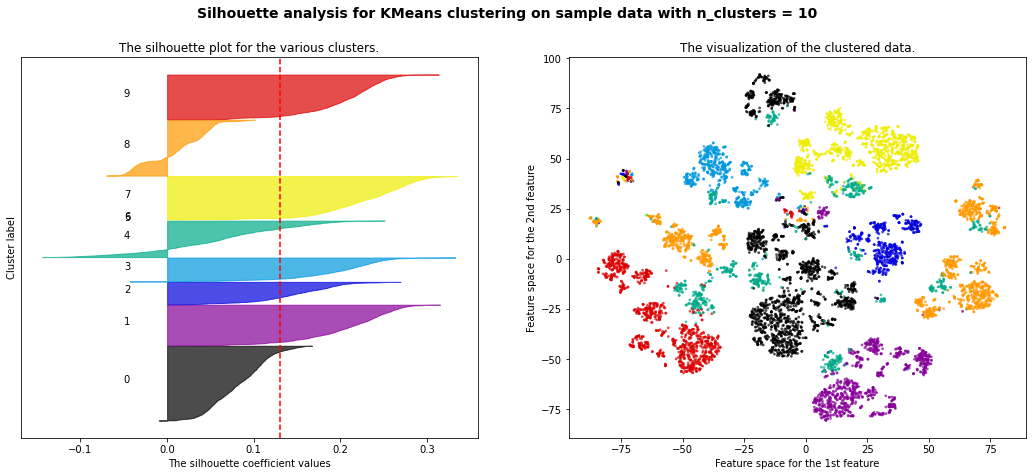

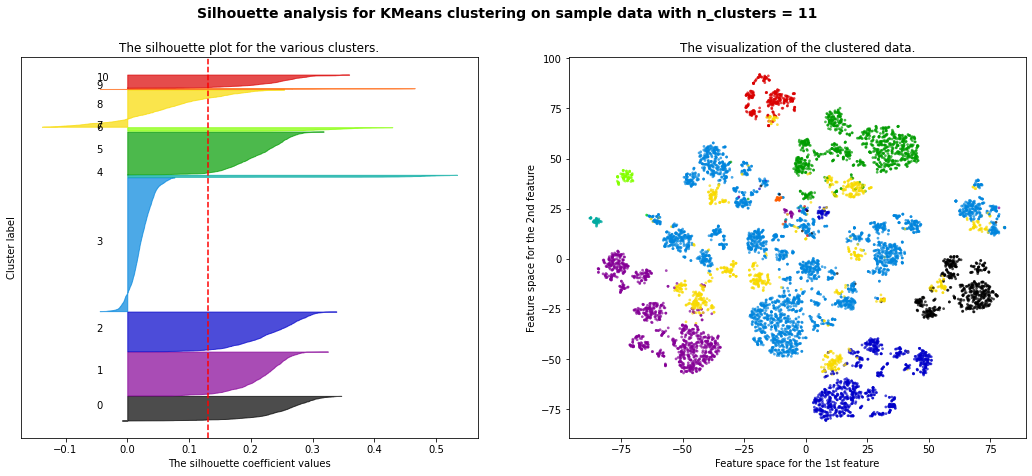

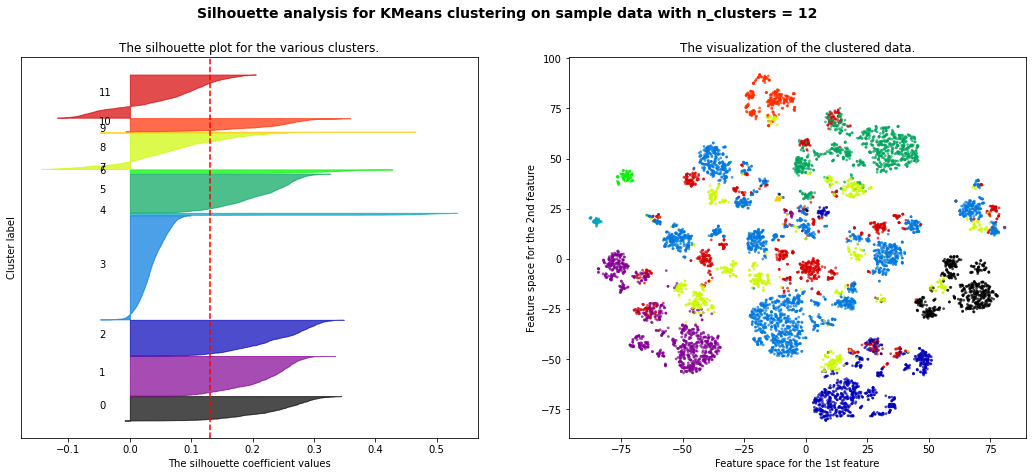

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

#tsne_1_5 = TSNE(n_components=2)####
#set_1_5_tsne = tsne_1_5.fit_transform(set_1_5_enc.copy())####

range_n_clusters = [ 4, 5, 6, 7, 8, 9, 10, 11, 12]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(set_1_5_enc) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(set_1_5_enc)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(set_1_5_enc, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(set_1_5_enc, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    #ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
   

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(set_1_5_tsne[:, 0], set_1_5_tsne[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
    #            c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
    #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
    #                s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### ACP

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=1)

In [ ]:
pca.fit(set_1_5_enc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

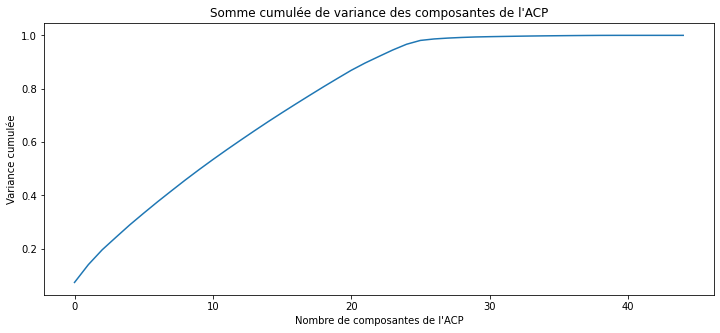

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(list(range(set_1_5_enc.shape[1])),
         np.cumsum(pca.explained_variance_ratio_))

In [ ]:
print('nb feature = 21 :',np.cumsum(pca.explained_variance_ratio_)[22])
print('nb feature = 22 :',np.cumsum(pca.explained_variance_ratio_)[23])
print('nb feature = 23 :',np.cumsum(pca.explained_variance_ratio_)[24])

nb feature = 21 : 0.9208296007202716
nb feature = 22 : 0.9450574924319786
nb feature = 23 : 0.9666166409395796


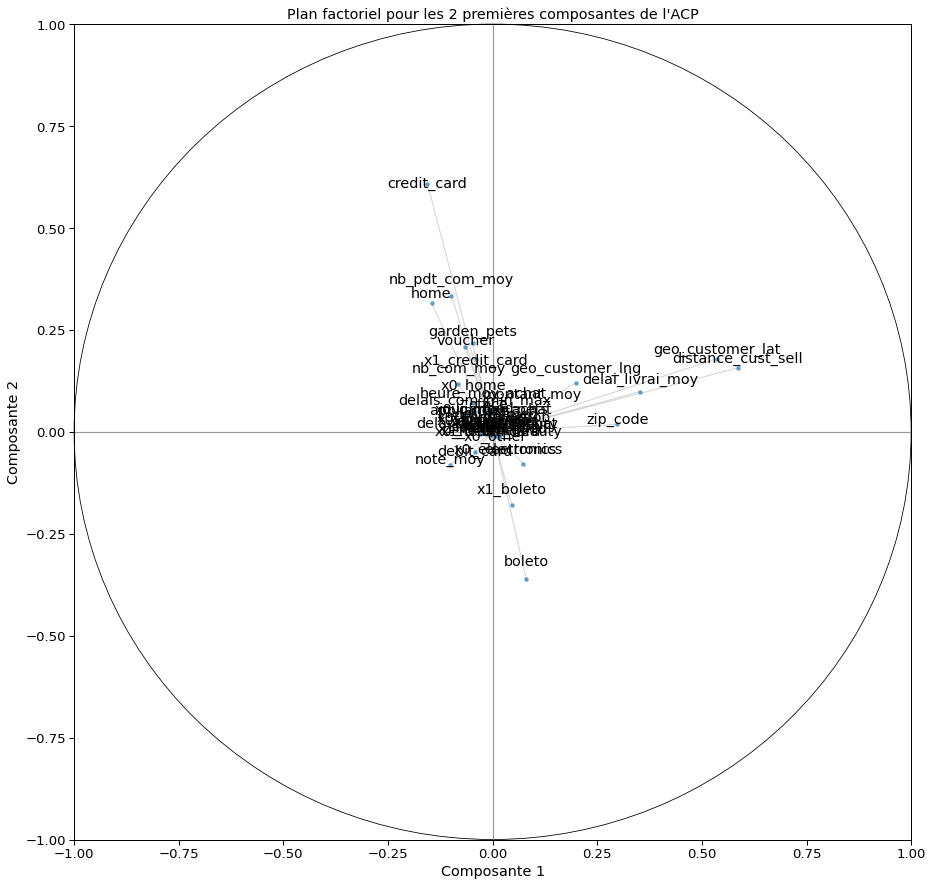

In [ ]:
colonnes_pca = set_1_5_enc.columns

from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(15,15))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', 
                    clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[0,:]
y_pca = pca.components_[1,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',
             alpha=0.2)


sns.set_context("paper", font_scale=1)

In [ ]:
#3 premières composantes
x_show = pca.transform(set_1_5_enc.select_dtypes(['float64','int32']))[:,0]
y_show = pca.transform(set_1_5_enc.select_dtypes(['float64','int32']))[:,1]
z_show = pca.transform(set_1_5_enc.select_dtypes(['float64','int32']))[:,2]

In [ ]:
X_pca = pca.transform(set_1_5_enc)[:,:21]

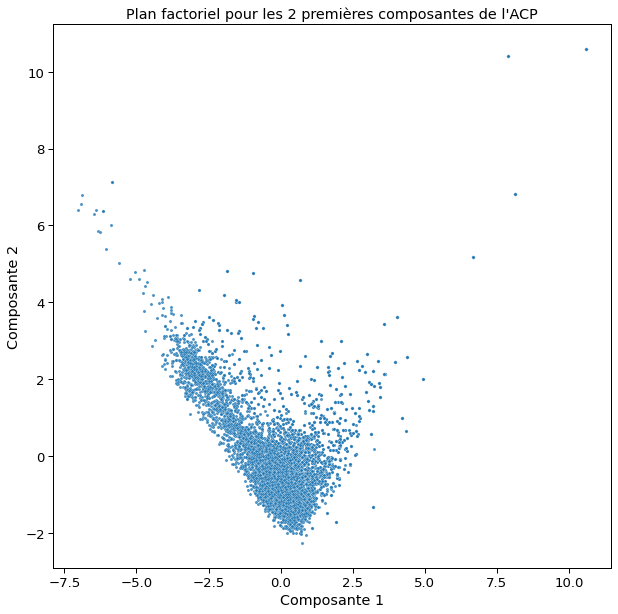

In [ ]:
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = x_show,
                y = y_show,
                #hue = hue_show,
                alpha=0.8, s=10)

sns.set_context("paper", font_scale=1)

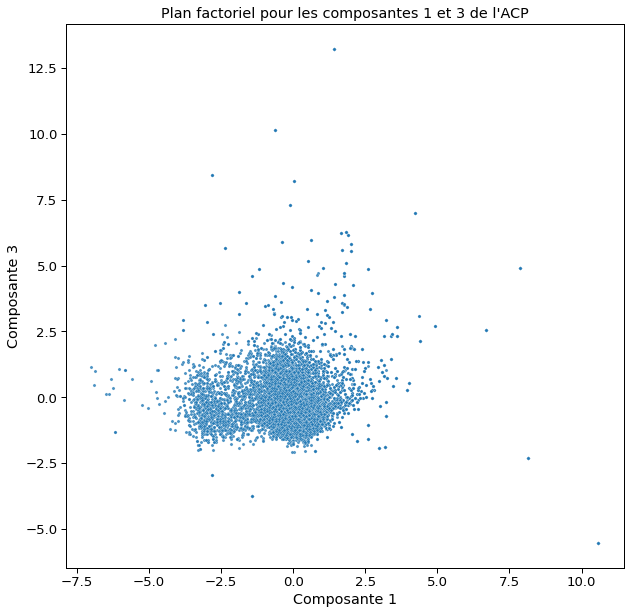

In [ ]:
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les composantes 1 et 3 de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 3')
ax = plt.gca()

sns.scatterplot(x = x_show,
                y = z_show,
                #hue = hue_show,
                alpha=0.8, s=10)
sns.set_context("paper", font_scale=1)

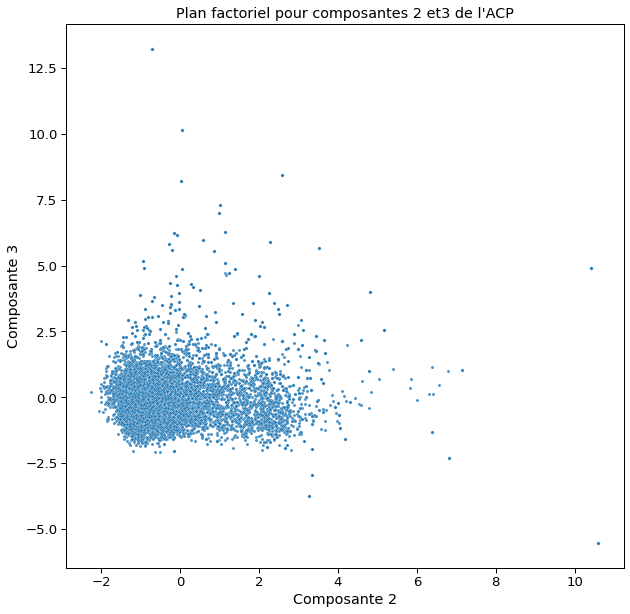

In [ ]:
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour composantes 2 et3 de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 2')
plt.ylabel('Composante 3')
ax = plt.gca()

sns.scatterplot(x = y_show,
                y = z_show,
                #hue = hue_show,
                alpha=0.8, s=10)

sns.set_context("paper", font_scale=1)

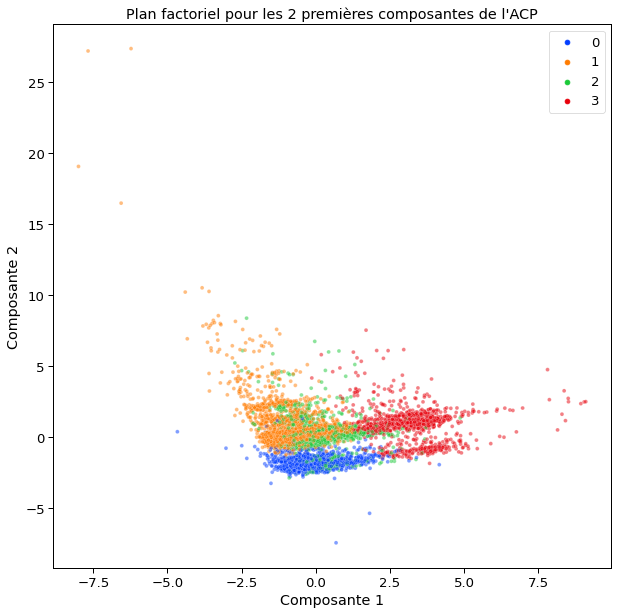

In [ ]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = x_show, 
                y = y_show, 
                hue = dic_kmeans_1_5[4].labels_,
                alpha=0.5, s=15, legend='full',palette="bright")



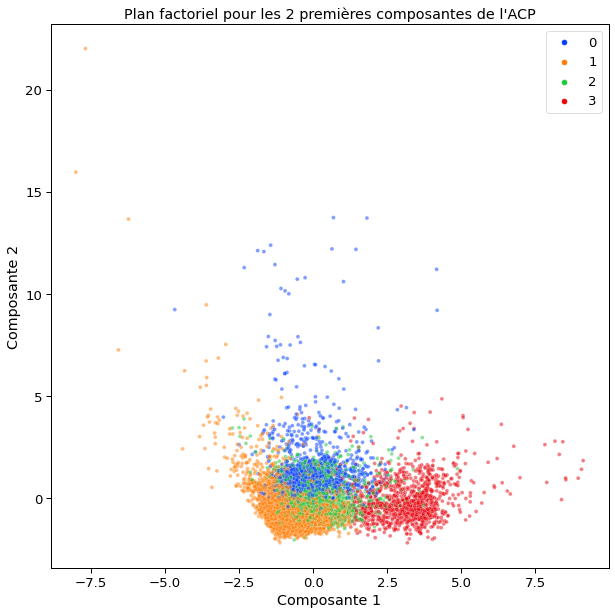

In [ ]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = x_show, 
                y = z_show, 
                hue = dic_kmeans_1_5[4].labels_,
                alpha=0.5, s=15, legend='full',palette="bright")



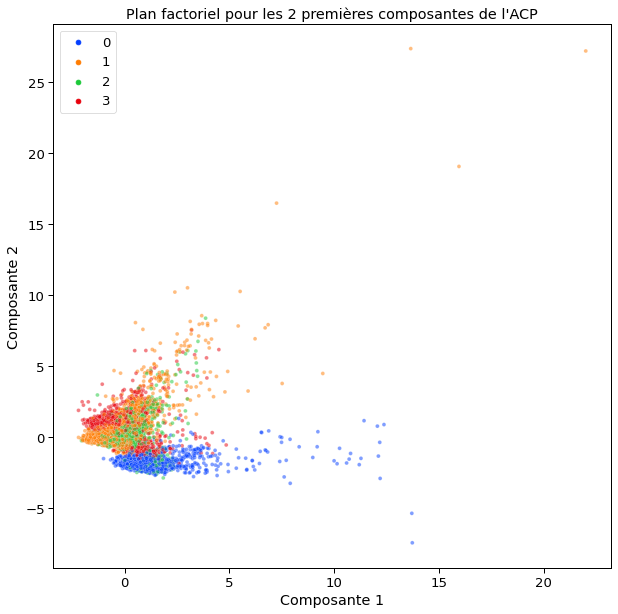

In [ ]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = z_show, 
                y = y_show, 
                hue = dic_kmeans_1_5[4].labels_,
                alpha=0.5, s=15, legend='full',palette="bright")



###Boucle de kmeans

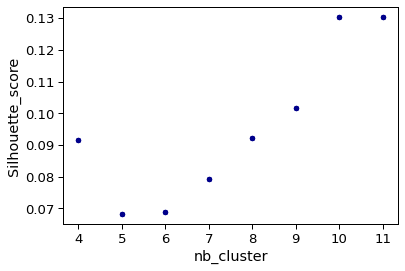

In [ ]:
num_boucle=[]
nb_clus=[]
S_scor=[]

for b in range (1,4,1):

  for i in range(4,12):
    kmeans = KMeans(n_clusters=i,verbose=1,random_state=0,n_jobs=-1).fit(set_1_5_enc)

    num_boucle.append(b)
    nb_clus.append(i)
    S_scor.append(silhouette_score(X = set_1_5_enc, labels= list(kmeans.labels_)))



var_sil_kmeans=pd.DataFrame()
var_sil_kmeans['num_boucle']=num_boucle
var_sil_kmeans['nb_cluster']=nb_clus
var_sil_kmeans['Silhouette_score']=S_scor

var_sil_kmeans=var_sil_kmeans.sort_values(by='nb_cluster') 
var_sil_kmeans.plot.scatter(x='nb_cluster',y='Silhouette_score',c='DarkBlue') 

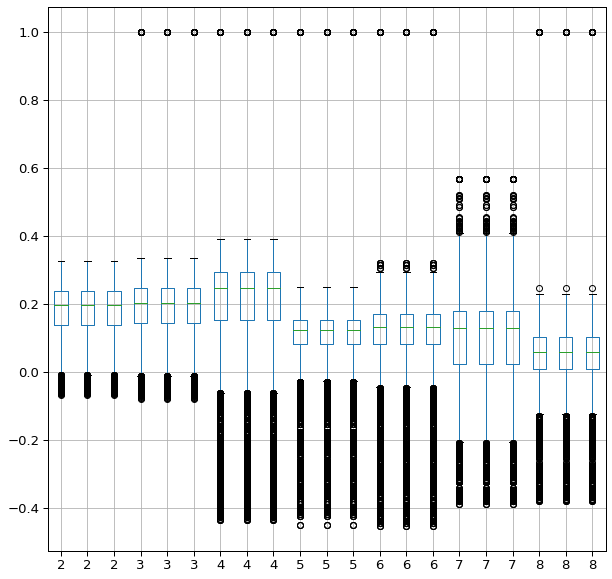

In [ ]:
num_boucle=[]
nb_clus=[]
S_scor=[]

for b in range (1,4,1):

  for i in range(2,9):
    kmeans = KMeans(n_clusters=i,verbose=1,random_state=0,n_jobs=-1).fit(set_1_5_enc)

    num_boucle.append(b)
    nb_clus.append(i)
    S_scor.append(silhouette_samples(X = set_1_5_enc, labels= list(kmeans.labels_)))

sil_sampl=pd.DataFrame(S_scor,index=nb_clus).T
sil_sampl=sil_sampl.sort_index(axis=1)
plt.figure(figsize=(10,10))
sil_sampl.boxplot()


### Kmean optimisé


In [ ]:
kmeans_opt = KMeans(n_clusters=11,verbose=1,random_state=0,n_jobs=-1).fit(set_1_5_enc)

In [ ]:
results = pd.DataFrame({})
results = results.append(pd.DataFrame({'Modele' : ['kmeans'],
                                       'Silhouette_score' : [silhouette_score(X = set_1_5_enc, labels= list(kmeans_opt.labels_))],
                                       'Davies_Bouldin_score' : [davies_bouldin_score(X = set_1_5_enc, labels= kmeans_opt.labels_)] ,
                                       'nb_cluster' : [11]}),ignore_index=True)

In [ ]:
results

Modele  Silhouette_score  Davies_Bouldin_score  nb_cluster
0  kmeans           0.13029              1.677172          11

##DB Scan

### optimisation heatmap

Silhouette


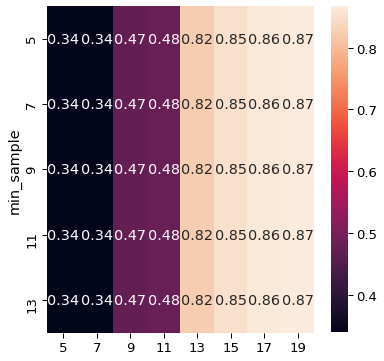

Davis-Boulidin


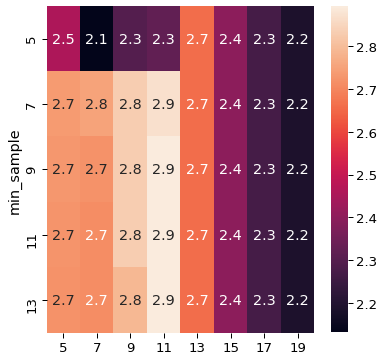

nb de cluster


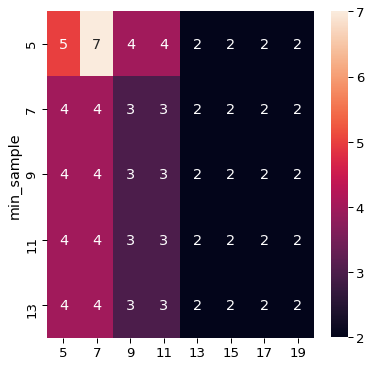

In [ ]:
frame_dbs=set_1_5_enc.copy()
n_epsilon= []
n_min_sample = []
sil_frame_dbs=pd.DataFrame()
DB_frame_dbs=pd.DataFrame()
clu_frame_dbs=pd.DataFrame()

for e in range(5,21,2):
  sil_dbs= []
  DB_dbs=[]
  nb_clu_dbs=[]
  for m in range(5,15,2):
    n_epsilon.append(e)
    n_min_sample.append(m)
    dbs_1 = DBSCAN(eps = e, min_samples=m, n_jobs=-1).fit(frame_dbs)

    #coef de silhouette
    sil_dbs.append(silhouette_score(X = frame_dbs, labels= dbs_1.labels_))
    #coef de DB
    DB_dbs.append(davies_bouldin_score(X = frame_dbs, labels= dbs_1.labels_))
    
    #nb de cluster
    label_DBS=pd.DataFrame(dbs_1.labels_)
    nb_clu_dbs.append(list(set(label_DBS.nunique()))[0])

  sil_frame_dbs[e]=sil_dbs
  DB_frame_dbs[e]=DB_dbs
  clu_frame_dbs[e]=nb_clu_dbs

#heatmap silhouette
print('Silhouette')
plt.figure(figsize=(6,6))
n_sample_index=pd.DataFrame(list(set(n_min_sample)),columns=['min_sample']) 
sil_frame_dbs=sil_frame_dbs.set_index(n_sample_index['min_sample'])
sns.heatmap(sil_frame_dbs,annot=True)
plt.show()

#heatmap DB
print('Davis-Boulidin')
plt.figure(figsize=(6,6))
n_sample_index=pd.DataFrame(list(set(n_min_sample)),columns=['min_sample']) 
DB_frame_dbs=DB_frame_dbs.set_index(n_sample_index['min_sample'])
sns.heatmap(DB_frame_dbs,annot=True)
plt.show()

#heatmap nb cluster
print('nb de cluster')
plt.figure(figsize=(6,6))
n_sample_index=pd.DataFrame(list(set(n_min_sample)),columns=['min_sample']) 
clu_frame_dbs=clu_frame_dbs.set_index(n_sample_index['min_sample'])
sns.heatmap(clu_frame_dbs,annot=True)
plt.show()

###DBScan optimisé

In [ ]:
dbs_opt = DBSCAN(eps = 11, min_samples=5, n_jobs=-1).fit(set_1_5_enc.copy())

In [ ]:
label_DBS=pd.DataFrame(dbs_opt.labels_)
nb_clu_dbs=list(set(label_DBS.nunique()))[0]

results = results.append(pd.DataFrame({'Modele' : ['DBscan'],
                                       'Silhouette_score' : [silhouette_score(X = set_1_5_enc, labels= list(dbs_opt.labels_))],
                                       'Davies_Bouldin_score' : [davies_bouldin_score(X = set_1_5_enc, labels= dbs_opt.labels_)] ,
                                       'nb_cluster' : [nb_clu_dbs]}),ignore_index=True)

In [ ]:
results

Modele  Silhouette_score  Davies_Bouldin_score  nb_cluster
0  kmeans          0.091623              2.746183           4
1  DBscan          0.480488              2.322005           4

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


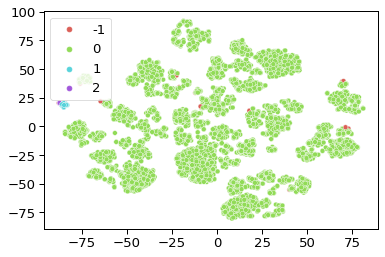

In [ ]:
sns.scatterplot(set_1_5_tsne[:,0],set_1_5_tsne[:,1],hue=dbs_opt.labels_,
                  legend='full', palette=sns.color_palette("hls",4))

##Clustering Hierarchique

### Dendogram

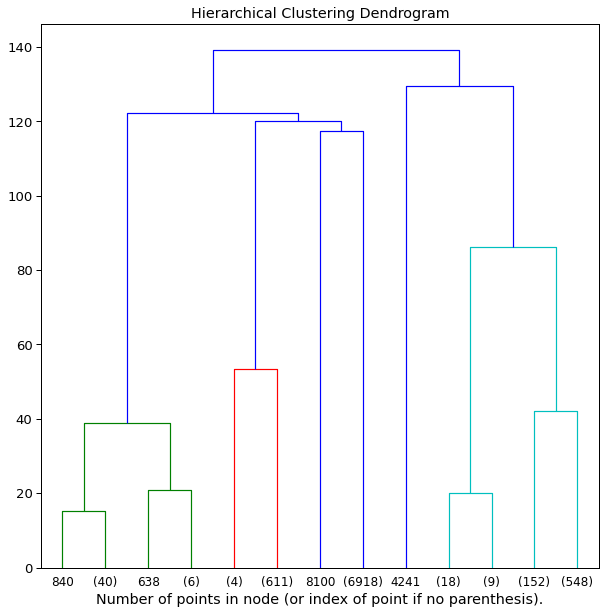

In [ ]:
def plot_dendrogram(model, **kwargs):

  from scipy.cluster.hierarchy import dendrogram
  # create the counts of samples under each node
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
      current_count = 0
      for child_idx in merge:
          if child_idx < n_samples:
              current_count += 1  # leaf node
          else:
              current_count += counts[child_idx - n_samples]
      counts[i] = current_count

  linkage_matrix = np.column_stack([model.children_, model.distances_,
                                    counts]).astype(float)

  # Plot the corresponding dendrogram
  dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(set_1_5_enc.copy())
plt.figure(figsize=(10,10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram

plot_dendrogram(model, truncate_mode='level', p=3)

plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

###hac

In [ ]:
dic_hac_1_5 = {}
for i in range(1,25):
    Hac_1 = AgglomerativeClustering(n_clusters=i).fit(set_1_5_enc.copy())
    dic_hac_1_5[i] = Hac_1

####Coef de Silhouette

In [ ]:
coef_sil_hac_1_5 = {}
for i in range(2,16):
    coef_sil_hac_1_5[i] = silhouette_score(X = set_1_5_enc, labels= list(dic_hac_1_5[(i)].labels_))

In [ ]:
coef_sil_hac_1_5

{2: 0.1287022472002149,
 3: 0.11747015040067163,
 4: 0.12574908142355934,
 5: 0.06283134637210266,
 6: 0.06412475734679986,
 7: 0.0798161673152116,
 8: 0.09090719780419675,
 9: 0.06629481393314104,
 10: 0.08168481772512715,
 11: 0.08621990170473146,
 12: 0.10429520643075262,
 13: 0.10753720002196013,
 14: 0.12087216161126257,
 15: 0.13662746245512414}

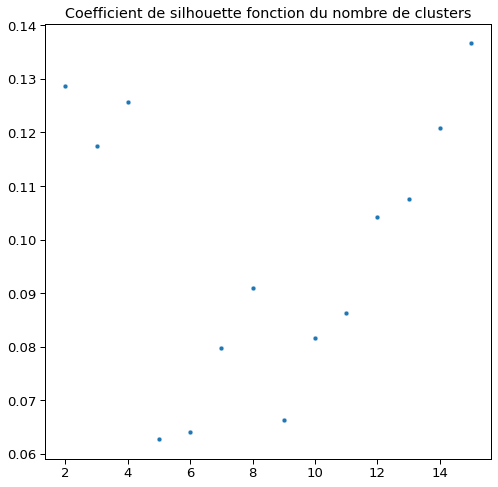

In [ ]:
plt.figure(figsize=(8,8)),
plt.title('Coefficient de silhouette fonction du nombre de clusters')
sns.scatterplot(x = list(coef_sil_hac_1_5.keys()),y = list(coef_sil_hac_1_5.values()))
plt.show()

#### Indice de Davies - Bouldin

In [ ]:
Ind_DB_hac_1_5 = {}
for i in range(2,16):
    Ind_DB_hac_1_5[i] = davies_bouldin_score(X = set_1_5_enc,
                                             labels= list(dic_hac_1_5[i].labels_))

In [ ]:
Ind_DB_hac_1_5

{2: 2.3433713873837756,
 3: 1.556957329392162,
 4: 1.3494900069295113,
 5: 1.5155518425023242,
 6: 1.2711201979917748,
 7: 1.469579780488432,
 8: 1.3604945334168574,
 9: 1.6414495815560441,
 10: 1.636644585485304,
 11: 1.7071528243550829,
 12: 1.7119490063280558,
 13: 1.589862850272257,
 14: 1.653852961159565,
 15: 1.647852496224608}

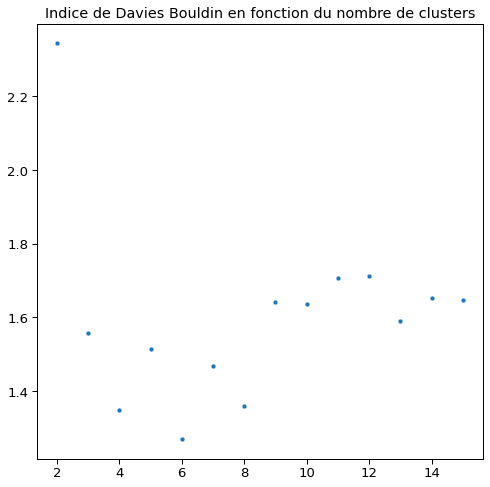

In [ ]:
plt.figure(figsize=(8,8)),
plt.title('Indice de Davies Bouldin en fonction du nombre de clusters')
sns.scatterplot(x = list(Ind_DB_hac_1_5.keys()),y = list(Ind_DB_hac_1_5.values()))
plt.show()

In [ ]:
### Coef de sikhouette max et indice de DB min pour nb de cluster = 4

###HAC optimisé

In [ ]:
Hac_opt = AgglomerativeClustering(n_clusters = 4).fit(set_1_5_enc.copy())

In [ ]:
results = results.append(pd.DataFrame({'Modele' : ['HAC'],
                                       'Silhouette_score' : [silhouette_score(X = set_1_5_enc, labels= list(Hac_opt.labels_))],
                                       'Davies_Bouldin_score' : [davies_bouldin_score(X = set_1_5_enc, labels= Hac_opt.labels_)] ,
                                       'nb_cluster' : [4]}),ignore_index=True)

In [ ]:
results

Modele  Silhouette_score  Davies_Bouldin_score  nb_cluster
0  kmeans          0.091623              2.746183           4
1  DBscan          0.480488              2.322005           4
2     HAC          0.125749              1.349490           4

##GMM

###Optimisation

In [ ]:
X=set_1_5_enc.copy()

#### Covariance_type

In [ ]:
n_comp=[]
covar=[]
sil_gmm=[]
DB_gmm=[]
nb_clu_gmm=[]



for i in range (2,9,1):
  
  for m in ['full','tied','diag','spherical']:

    print('n_compo=',i)
    print('covariance =' , m)

    gmm_1 = gmm(n_components=i,covariance_type=m).fit(X)
    labels_gmm = gmm_1.predict(X)
    
    n_comp.append(i)
    covar.append(m)

    #coef de silhouette
    sil_gmm.append(silhouette_score(X = set_1_5_enc, labels= labels_gmm))
    #coef de DB
    DB_gmm.append(davies_bouldin_score(X = set_1_5_enc, labels= labels_gmm))
    #nb de cluster
    fram_labels_gmm=pd.DataFrame(labels_gmm)
    nb_clu_gmm.append(list(set(fram_labels_gmm.nunique()))[0])

result_gmm=pd.DataFrame()
result_gmm['n_comp']=n_comp
result_gmm['covariance']=covar
result_gmm['silhouette_score']=sil_gmm
result_gmm['DB_score']=DB_gmm
result_gmm['nb_cluster']=nb_clu_gmm
result_gmm

n_compo= 2
covariance = full
n_compo= 2
covariance = tied
n_compo= 2
covariance = diag
n_compo= 2
covariance = spherical
n_compo= 3
covariance = full
n_compo= 3
covariance = tied
n_compo= 3
covariance = diag
n_compo= 3
covariance = spherical
n_compo= 4
covariance = full
n_compo= 4
covariance = tied
n_compo= 4
covariance = diag
n_compo= 4
covariance = spherical
n_compo= 5
covariance = full
n_compo= 5
covariance = tied
n_compo= 5
covariance = diag
n_compo= 5
covariance = spherical
n_compo= 6
covariance = full
n_compo= 6
covariance = tied
n_compo= 6
covariance = diag
n_compo= 6
covariance = spherical
n_compo= 7
covariance = full
n_compo= 7
covariance = tied
n_compo= 7
covariance = diag
n_compo= 7
covariance = spherical
n_compo= 8
covariance = full
n_compo= 8
covariance = tied
n_compo= 8
covariance = diag
n_compo= 8
covariance = spherical


n_comp covariance  silhouette_score  DB_score  nb_cluster
0        2       full          0.346430  4.560205           2
1        2       tied          0.031437  2.895480           2
2        2       diag          0.378493  4.826329           2
3        2  spherical          0.412424  4.695626           2
4        3       full          0.243038  4.420868           3
5        3       tied          0.114437  2.791933           3
6        3       diag          0.052349  4.133831           3
7        3  spherical          0.116450  3.965838           3
8        4       full          0.119489  3.814210           4
9        4       tied          0.113913  2.294046           4
10       4       diag          0.031209  4.338309           4
11       4  spherical          0.110629  3.631693           4
12       5       full          0.044518  3.275459           5
13       5       tied          0.061647  1.950189           5
14       5       diag          0.045170  3.689970           5
15       5  spherical          0.040942  3.697853           5
16       6       full          0.072177  3.763416           6
17       6       tied          0.076933  2.317315           6
18       6       diag          0.083986  3.508103           6
19       6  spherical          0.036710  3.494465           6
20       7       full          0.067754  2.656128           7
21       7       tied          0.095848  2.407453           7
22       7       diag          0.085939  2.871510           7
23       7  spherical         -0.005226  3.506438           7
24       8       full          0.079747  2.905977           8
25       8       tied          0.092497  2.138360           8
26       8       diag          0.097510  2.731730           8
27       8  spherical          0.038938  3.010549           8

In [ ]:
n_comp=[]
covar=[]
sil_gmm=[]
DB_gmm=[]
nb_clu_gmm=[]
num_boucle = []

for t in range (1,5,1):

  for i in range (2,9,1):
    
    for m in ['full','tied','diag','spherical']:

      print('boucle =',t)
      print('n_compo=',i)
      print('covariance =' , m)

      gmm_1 = gmm(n_components=i,covariance_type=m).fit(X)
      labels_gmm = gmm_1.predict(X)
      
      num_boucle.append(t)
      n_comp.append(i)
      covar.append(m)

      #coef de silhouette
      sil_gmm.append(silhouette_score(X = set_1_5_enc, labels= labels_gmm))
      #coef de DB
      DB_gmm.append(davies_bouldin_score(X = set_1_5_enc, labels= labels_gmm))
      #nb de cluster
      fram_labels_gmm=pd.DataFrame(labels_gmm)
      nb_clu_gmm.append(list(set(fram_labels_gmm.nunique()))[0])

      print('OK')
      print('-'*45)

result_gmm=pd.DataFrame()
result_gmm['num_boucle']=num_boucle
result_gmm['n_comp']=n_comp
result_gmm['covariance']=covar
result_gmm['silhouette_score']=sil_gmm
result_gmm['DB_score']=DB_gmm
result_gmm['nb_cluster']=nb_clu_gmm
result_gmm

boucle = 1
n_compo= 2
covariance = full
OK
---------------------------------------------
boucle = 1
n_compo= 2
covariance = tied
OK
---------------------------------------------
boucle = 1
n_compo= 2
covariance = diag
OK
---------------------------------------------
boucle = 1
n_compo= 2
covariance = spherical
OK
---------------------------------------------
boucle = 1
n_compo= 3
covariance = full
OK
---------------------------------------------
boucle = 1
n_compo= 3
covariance = tied
OK
---------------------------------------------
boucle = 1
n_compo= 3
covariance = diag
OK
---------------------------------------------
boucle = 1
n_compo= 3
covariance = spherical
OK
---------------------------------------------
boucle = 1
n_compo= 4
covariance = full
OK
---------------------------------------------
boucle = 1
n_compo= 4
covariance = tied
OK
---------------------------------------------
boucle = 1
n_compo= 4
covariance = diag
OK
---------------------------------------------
boucle = 1


num_boucle  n_comp covariance  silhouette_score  DB_score  nb_cluster
0             1       2       full          0.346430  4.560205           2
1             1       2       tied          0.087335  3.070562           2
2             1       2       diag          0.096236  3.104177           2
3             1       2  spherical          0.412648  4.695082           2
4             1       3       full          0.050683  4.001940           3
..          ...     ...        ...               ...       ...         ...
107           4       7  spherical          0.077741  3.081522           7
108           4       8       full          0.081254  3.698618           8
109           4       8       tied          0.099605  2.228281           8
110           4       8       diag          0.097702  3.101702           8
111           4       8  spherical          0.045092  3.119256           8

[112 rows x 6 columns]

covariance = full
Score de silhouette :
          2         3         4         5         6         7         8
0  0.346430  0.050683  0.067382  0.208970  0.151258  0.067389  0.093440
1  0.339513  0.235923  0.082717  0.078692  0.066916  0.082758  0.093417
2  0.412674  0.078531  0.067710  0.097455  0.051259  0.072552  0.079507
3  0.087335  0.076460  0.051817  0.058913  0.089401  0.064687  0.081254


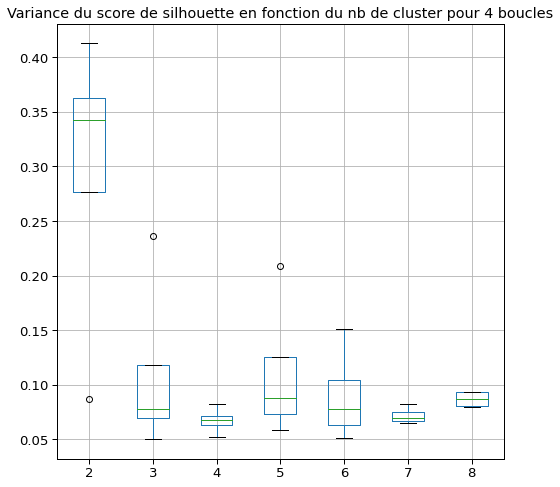

Score de Davies Bouldin :
          2         3         4         5         6         7         8
0  4.560205  4.001940  4.025670  2.537628  2.967623  2.696983  2.426145
1  4.524950  4.745780  3.549697  3.457282  3.059901  3.411839  2.909054
2  3.972023  4.002651  4.170152  3.464405  3.514372  2.972072  3.288180
3  3.070562  3.602830  3.979615  3.820663  2.615496  3.701218  3.698618


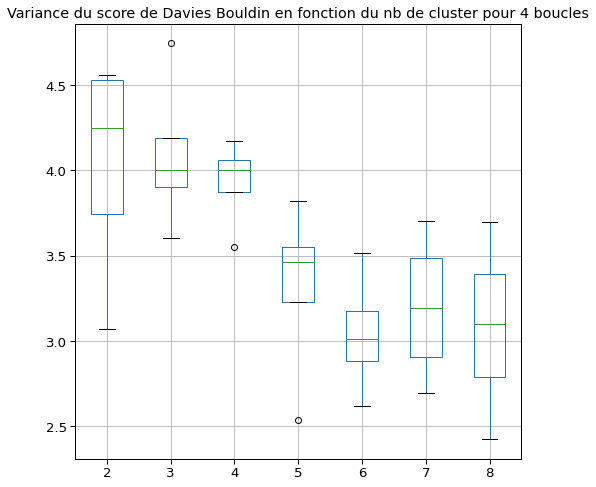

---------------------------------------------
covariance = tied
Score de silhouette :
          2         3         4         5         6         7         8
0  0.087335  0.152976  0.110697  0.098507  0.095622  0.101020  0.119257
1  0.182061  0.100951  0.071196  0.069471  0.085541  0.091257  0.096086
2  0.173114  0.115389  0.046853  0.069831  0.100855  0.100674  0.116540
3  0.135416  0.050179  0.108744  0.109501  0.079338  0.099846  0.099605


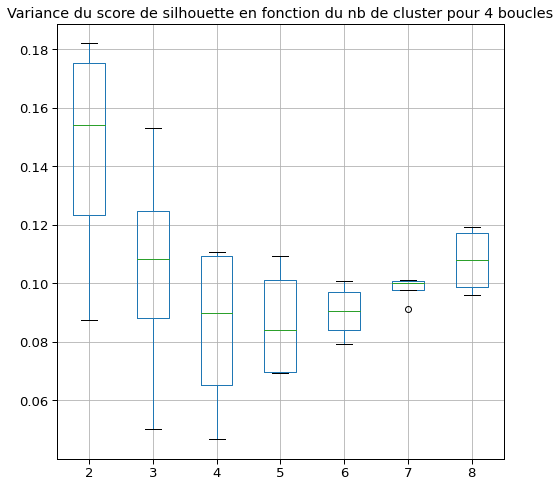

Score de Davies Bouldin :
          2         3         4         5         6         7         8
0  3.070562  2.244647  2.288084  2.612888  1.875856  2.389277  2.346572
1  2.495910  2.899959  2.686090  3.219612  2.807739  2.631521  1.923255
2  2.468839  2.796737  2.967802  2.585449  2.306303  2.082717  2.160595
3  1.902361  2.759843  2.344418  2.246513  2.240627  2.555408  2.228281


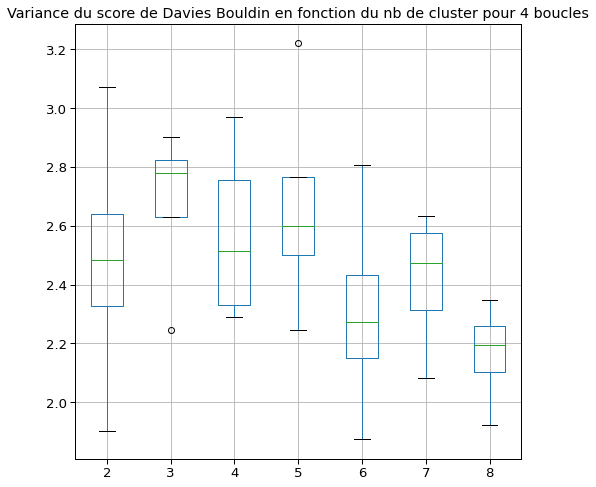

---------------------------------------------
covariance = diag
Score de silhouette :
          2         3         4         5         6         7         8
0  0.096236  0.056812  0.064555  0.080224  0.060328  0.059323  0.111240
1  0.030834  0.049683  0.089617  0.060859  0.058724  0.074587  0.091221
2  0.129582  0.363718  0.056815  0.043495  0.058936  0.065829  0.080588
3  0.239896  0.102831  0.061893  0.070063  0.068242  0.054186  0.097702


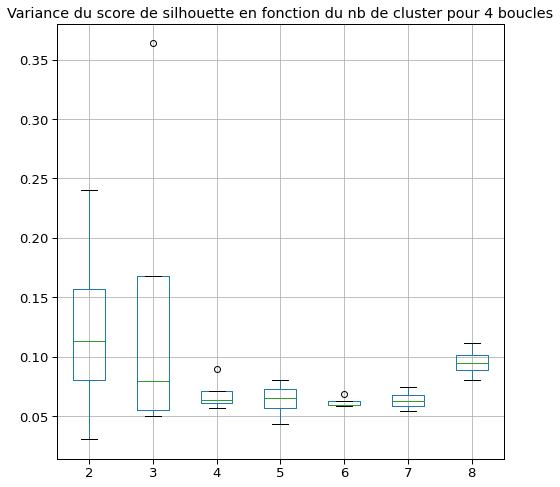

Score de Davies Bouldin :
          2         3         4         5         6         7         8
0  3.104177  4.118920  3.702394  3.248553  2.562067  3.262373  2.371377
1  4.567772  3.041438  3.527001  3.620835  3.534975  3.322594  2.566463
2  5.262815  4.324942  3.970320  4.202456  2.823637  3.271743  2.792588
3  5.134822  4.234671  3.610677  3.395305  3.158904  3.284063  3.101702


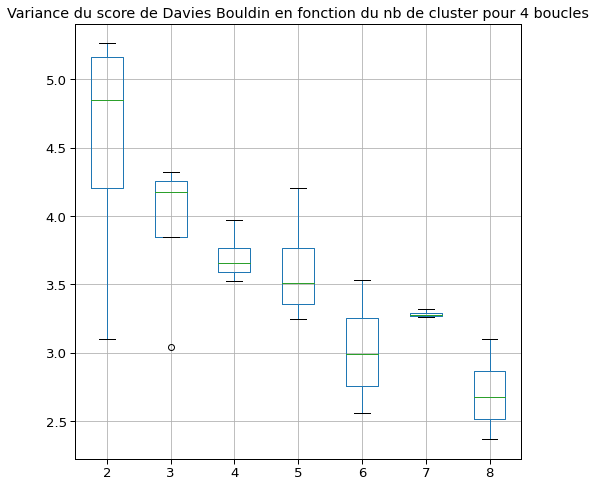

---------------------------------------------
covariance = spherical
Score de silhouette :
          2         3         4         5         6         7         8
0  0.412648  0.057118  0.086809  0.061279  0.034911  0.037196  0.006826
1  0.412424  0.098753  0.086612  0.072955  0.077838  0.030886  0.016743
2  0.412424  0.149462  0.126958  0.006675 -0.029036  0.015540  0.026138
3  0.412424  0.387959  0.021444  0.034896  0.016771  0.077741  0.045092


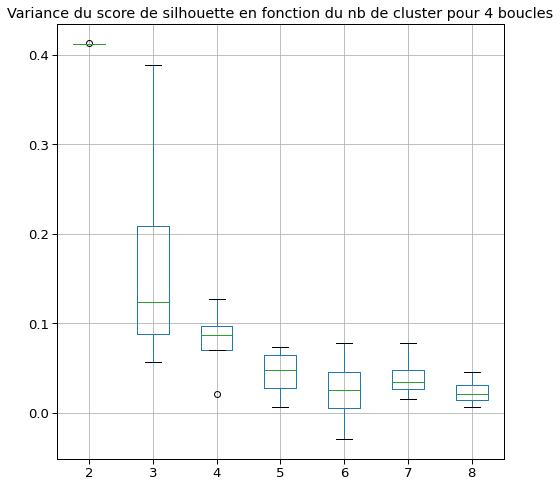

Score de Davies Bouldin :
          2         3         4         5         6         7         8
0  4.695082  4.695312  3.855702  4.385947  4.149179  3.137687  3.286859
1  4.695626  4.786223  3.862832  3.761012  3.066910  3.478282  3.245748
2  4.695626  4.017808  3.621500  3.806765  3.633756  3.327924  3.115615
3  4.695626  3.221764  4.225734  4.404311  3.089007  3.081522  3.119256


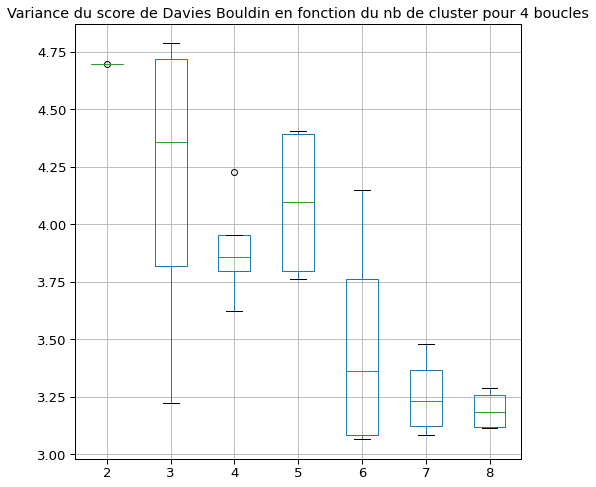

---------------------------------------------


In [ ]:
for m in ['full','tied','diag','spherical']:

  frame_boxplot_gmm_sil = pd.DataFrame()
  frame_boxplot_gmm_db = pd.DataFrame()

  for i in result_gmm['nb_cluster'].unique():

    X_filtre= result_gmm [result_gmm['nb_cluster']==i ]
    Y_filtre=X_filtre[X_filtre['covariance']== m]
    Y_filtre=Y_filtre.reset_index(drop=True)

    frame_boxplot_gmm_sil[i]=Y_filtre['silhouette_score']
    frame_boxplot_gmm_db[i]=Y_filtre['DB_score']

  print('covariance =', m) 

  print('Score de silhouette :') 
  print(frame_boxplot_gmm_sil)
  plt.figure(figsize=(8,8))
  plt.title('Variance du score de silhouette en fonction du nb de cluster pour 4 boucles')
  frame_boxplot_gmm_sil.boxplot()
  plt.show()

  print('Score de Davies Bouldin :') 
  print(frame_boxplot_gmm_db)
  plt.figure(figsize=(8,8))
  plt.title('Variance du score de Davies Bouldin en fonction du nb de cluster pour 4 boucles')
  frame_boxplot_gmm_db.boxplot()
  plt.show()

  print('-'*45)

####nb de cluster

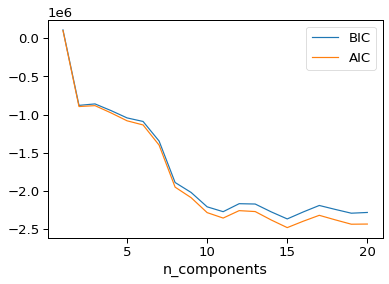

In [ ]:
n_components = np.arange(1, 21)
models = [gmm(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

silhouette_score = 0.11786564953647422
db_score = 2.1929522472435656


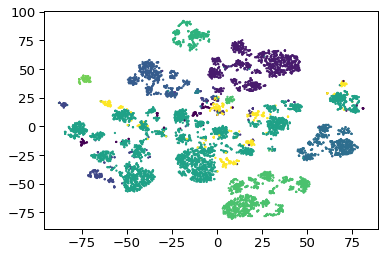

In [ ]:
gmm_opt_max = gmm(n_components=15,covariance_type='full' ).fit(set_1_5_enc)
labels_gmm_opt_max = gmm_opt_max.predict(set_1_5_enc)
print('silhouette_score =', silhouette_score(X = set_1_5_enc, labels= labels_gmm_opt_max))
print('db_score =', davies_bouldin_score(X = set_1_5_enc, labels= labels_gmm_opt_max))
plt.scatter(set_1_5_tsne[:, 0], set_1_5_tsne[:, 1], c=labels_gmm_opt_max, cmap='viridis', s=2);

In [ ]:
### Trop de cluster pour des scores moindres

### GMM optimisé

In [ ]:
gmm_opt = gmm(n_components=6,covariance_type='full' ).fit(set_1_5_enc)
labels_gmm_opt = gmm_opt.predict(set_1_5_enc)

In [ ]:
results = results.append(pd.DataFrame({'Modele' : ['GMM'],
                                       'Silhouette_score' : [silhouette_score(X = set_1_5_enc, labels= labels_gmm_opt)],
                                       'Davies_Bouldin_score' : [davies_bouldin_score(X = set_1_5_enc, labels= labels_gmm_opt)] ,
                                       'nb_cluster' : [6]}),ignore_index=True)

#Comparaison des modèles

In [ ]:
results=results.set_index('Modele')
results

Silhouette_score  Davies_Bouldin_score  nb_cluster
Modele                                                    
kmeans          0.091623              2.746183           4
DBscan          0.480488              2.322005           4
HAC             0.125749              1.349490           4
GMM             0.126053              3.496623           6

Text(0.5, 1.0, 'Comparaison des différents modèles')

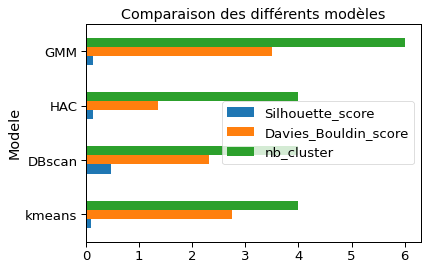

In [ ]:
results.plot.barh()
plt.title('Comparaison des différents modèles')

In [ ]:
## DBSCAN présentes les meilleurs scores mais pas assez de mémoires pour faire tourner sur le set global
### ==> modèle retenu = Kmeans

#Application du modèle dans le temps

##Rand sur 8 mois

In [ ]:
list_set_tps= {1:set_1_5_enc,2:set_time_1_3_2_3_enc,3:global_data_enc}
list_set_pred= {1:set_time_2_5_enc,2:set_time_3_5_enc,3:global_data_enc}

In [ ]:
def Kmean_rand (set_1,set_2,set_predict):
  fram_1=set_1.copy()
  fram_2=set_2.copy()
  fram_pred=set_predict.copy()
#fit 1
  kmeans_1= KMeans(n_clusters=6,verbose=1,random_state=0,n_jobs=-1).fit(fram_1)
#predict 1 
  label_1=kmeans_1.predict(fram_pred)
#fit 2
  kmeans_2= KMeans(n_clusters=6,verbose=1,random_state=0,n_jobs=-1).fit(fram_2)
#predict  
  label_2=kmeans_2.predict(fram_pred)
#Indice de Rand
  ind_rand=adjusted_rand_score(label_1,label_2)
  return ind_rand

In [ ]:
num_set1=[]
num_set2=[]
num_set_pred=[]
rand_resul=[]

n=0

for i,s in list_set_tps.items():
  k=0
  
  for j,p in list_set_pred.items():
    
    k+=1
    
    if i+k <= len(list_set_tps):
      l=list_set_tps[i+k]
      q=list_set_pred[j+n]

      num_set1.append(i)
      num_set2.append(i+k)
      num_set_pred.append(j+n)

      print(i,i+k,j+n)
      rand_resul.append(Kmean_rand(s,l,q))
      print('ok')

  n+=1

resul_time_rand=pd.DataFrame()    
resul_time_rand['num_set1']=num_set1
resul_time_rand['num_set2']=num_set2
resul_time_rand['num_set_pred']=num_set_pred
resul_time_rand['rand_resul']=rand_resul

map_set_5={1:'1/3',2:'1+2/3',3:'1+2+3/3'}
map_pred_5={1:'2/3',2:'3/3'}

resul_time_rand['num_set1']=resul_time_rand['num_set1'].map(map_set_5)
resul_time_rand['num_set2']=resul_time_rand['num_set2'].map(map_set_5)
resul_time_rand['num_set_pred']=resul_time_rand['num_set_pred'].map(map_pred_5)

resul_time_rand

1 2 1
ok
1 3 2
ok
2 3 2
ok


num_set1 num_set2 num_set_pred  rand_resul
0      1/3    1+2/3          2/3    0.249153
1      1/3  1+2+3/3          3/3    0.489292
2    1+2/3  1+2+3/3          3/3    0.614434

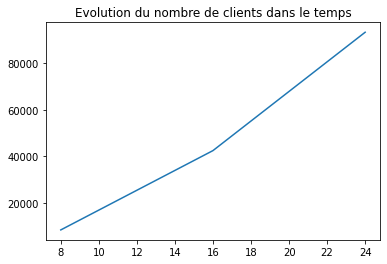

In [ ]:
### Evolution du nombre de clients dans le temps
int_tps= 8 ## Interval de temps 

list_len=[]
list_time=[]

for i,s in list_set_tps.items():
  list_len.append(len(s))

  t=i*int_tps
  list_time.append(t)

plt.title('Evolution du nombre de clients dans le temps')
plt.plot(list_time,list_len)

##Rand sur 4,5 mois

In [ ]:
set_time_1 = encodage_OHE(pd.read_csv('P5_set_time_1_5.csv').set_index('customer_unique_id'))
set_time_2 = encodage_OHE(pd.read_csv('P5_set_time_2_5.csv').set_index('customer_unique_id'))
set_time_3 = encodage_OHE(pd.read_csv('P5_set_time_3_5.csv').set_index('customer_unique_id'))
set_time_4 = encodage_OHE(pd.read_csv('P5_set_time_1_3_2_3.csv').set_index('customer_unique_id'))
set_time_5 = encodage_OHE(pd.read_csv('P5_set_time_2_3_3_3.csv').set_index('customer_unique_id'))
set_time_12 = encodage_OHE(pd.read_csv('P5_set_time_1_5.csv').set_index('customer_unique_id'))
set_time_123 = encodage_OHE(pd.read_csv('P5_set_time_2_5.csv').set_index('customer_unique_id'))
set_time_1234 = encodage_OHE(pd.read_csv('P5_set_time_3_5.csv').set_index('customer_unique_id'))
set_time_12345= encodage_OHE(pd.read_csv('P5_global_data.csv').set_index('customer_unique_id'))

In [ ]:
list_set_tps = {1:set_time_1,2:set_time_12,3:set_time_123,4:set_time_1234,5:set_time_12345}
list_set_pred = {1:set_time_2,2:set_time_3,3:set_time_4,4:set_time_5,5:set_time_12345}

In [ ]:
num_set1=[]
num_set2=[]
num_set_pred=[]
rand_resul=[]

n=0

for i,s in list_set_tps.items():
  k=0
  
  for j,p in list_set_pred.items():
    
    k+=1
    
    if i+k <= len(list_set_tps):
      l=list_set_tps[i+k]
      q=list_set_pred[j+n]

      num_set1.append(i)
      num_set2.append(i+k)
      num_set_pred.append(j+n)

      print(i,i+k,j+n,'...')
      rand_resul.append(Kmean_rand(s,l,q))
      print('ok')

  n+=1

resul_time_rand=pd.DataFrame()    
resul_time_rand['num_set1']=num_set1
resul_time_rand['num_set2']=num_set2
resul_time_rand['num_set_pred']=num_set_pred
resul_time_rand['rand_resul']=rand_resul

map_set_5={1:'1/5',2:'1+2/5',3:'1+2+3/5',4:'1+2+3+4/5',5:'1+2+3+4+5/5'}
map_pred_5={1:'2/5',2:'3/5',3:'4/5',4:'5/5',5:'global'}

resul_time_rand['num_set1']=resul_time_rand['num_set1'].map(map_set_5)
resul_time_rand['num_set2']=resul_time_rand['num_set2'].map(map_set_5)
resul_time_rand['num_set_pred']=resul_time_rand['num_set_pred'].map(map_pred_5)

resul_time_rand

1 2 1 ...
ok
1 3 2 ...
ok
1 4 3 ...
ok
1 5 4 ...
ok
2 3 2 ...
ok
2 4 3 ...
ok
2 5 4 ...
ok
3 4 3 ...
ok
3 5 4 ...
ok
4 5 4 ...
ok


num_set1     num_set2 num_set_pred  rand_resul
0        1/5        1+2/5          2/5    1.000000
1        1/5      1+2+3/5          3/5    0.514756
2        1/5    1+2+3+4/5          4/5    0.530999
3        1/5  1+2+3+4+5/5          5/5    0.473470
4      1+2/5      1+2+3/5          3/5    0.514756
5      1+2/5    1+2+3+4/5          4/5    0.530999
6      1+2/5  1+2+3+4+5/5          5/5    0.473470
7    1+2+3/5    1+2+3+4/5          4/5    0.609104
8    1+2+3/5  1+2+3+4+5/5          5/5    0.440976
9  1+2+3+4/5  1+2+3+4+5/5          5/5    0.469919

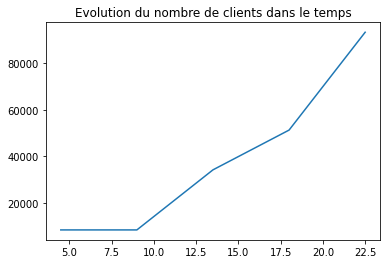

In [ ]:
### Evolution du nombre de clients dans le temps
int_tps= 4.5 ## Interval de temps 

list_len=[]
list_time=[]

for i,s in list_set_tps.items():
  list_len.append(len(s))

  t=i*int_tps
  list_time.append(t)

plt.title('Evolution du nombre de clients dans le temps')
plt.plot(list_time,list_len)

In [ ]:
for i,s in list_set_tps.items():
  print(i,len(s))

1 8310
2 8310
3 34144
4 51243
5 93318


# Marketing 4 clusters

In [ ]:
kmeans_mark= KMeans(n_clusters=4,verbose=1,random_state=0,n_jobs=-1).fit(global_data_enc)
label_mark=kmeans_mark.predict(global_data_enc)

In [ ]:
market_set=global_data.copy()
market_set['Label']=label_mark
market_set=market_set.sort_values('Label')

In [ ]:
market_set

distance_cust_sell  ...  Label
customer_unique_id                                    ...       
44b49176f1aca9533b67f3eedab0b2de            3.975156  ...      0
794307f7c4fd6c8325655fb3f7b89895            4.158802  ...      0
cf32aeb4e8a323e6499a573ac5c90326            1.488785  ...      0
3884effb73a5df3aa3d6c4b458e55dbd            2.905904  ...      0
388661387449408a9ab88ea55c9f1a0f           10.241829  ...      0
...                                              ...  ...    ...
cb122aa513fca4ae239b13e057b1e012           16.535090  ...      3
1d5bf38084a1b6251519e2b7cf9a54e8           18.297738  ...      3
cb1094479eadcebfb39f971ddfd2fd97           22.127002  ...      3
5ad76b2e1b9830ec678ccda420872dcf           14.799335  ...      3
a2dd5f180fe290a91398ed6c8f6b424f           18.241005  ...      3

[93318 rows x 32 columns]

### Nb de client par cluster

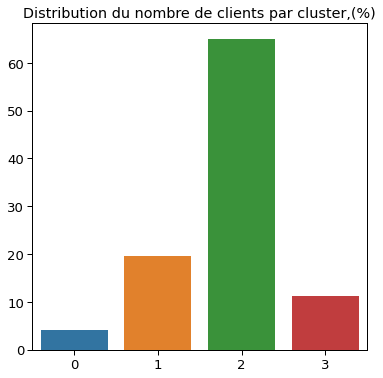

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Distribution du nombre de clients par cluster,(%)')
sns.barplot(x = market_set['Label'].value_counts().index, 
           y=market_set['Label'].value_counts().values/len(market_set)*100)

In [ ]:
market_set['Label'].value_counts()

2    60678
1    18277
3    10513
0     3850
Name: Label, dtype: int64

##Profils client

In [ ]:
group_clu = market_set.groupby('Label').mean()
group_clu=group_clu.drop(['zip_code','geo_customer_lat','geo_customer_lng'],axis=1)

In [ ]:
group_clu

distance_cust_sell  nb_com_moy  ...  debit_card  not_defined
Label                                  ...                         
0                4.651082    1.834286  ...    0.031169     0.000000
1                6.977076    1.005417  ...    0.013952     0.000164
2                3.303153    1.002818  ...    0.018606     0.000000
3               16.583452    1.011034  ...    0.015695     0.000000

[4 rows x 26 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

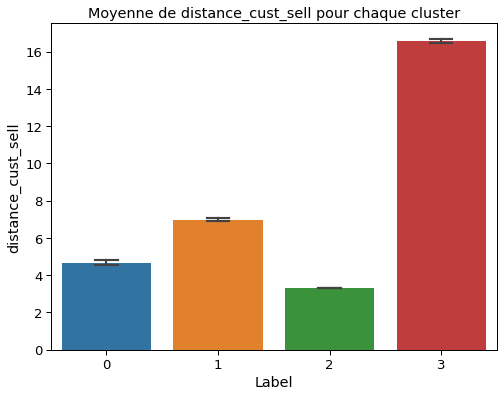

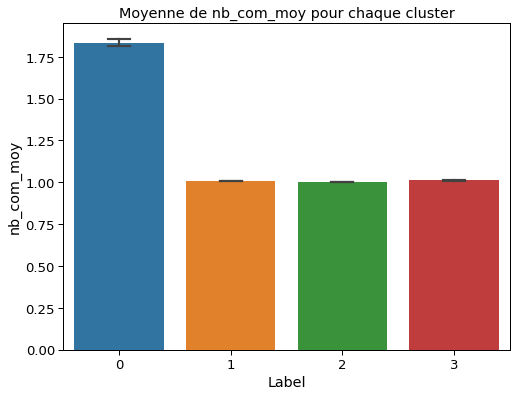

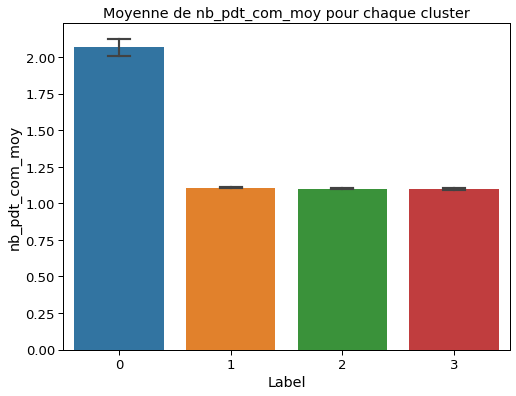

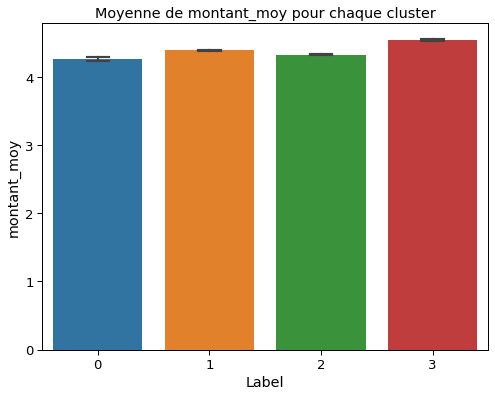

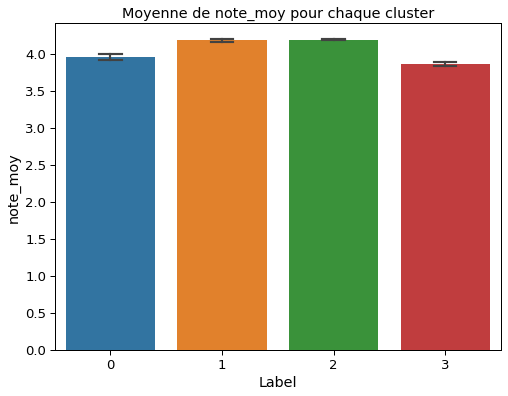

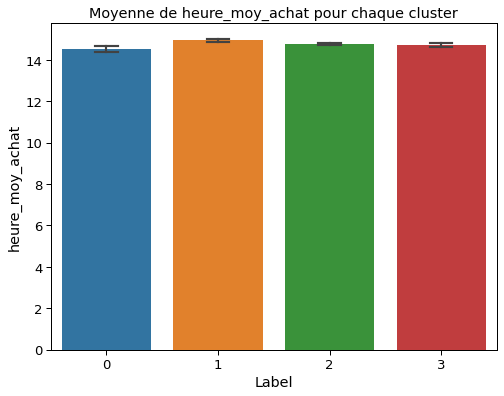

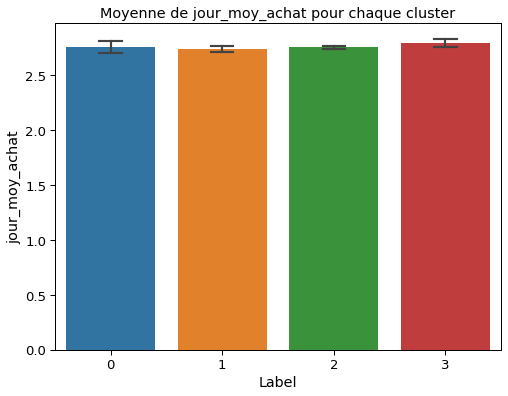

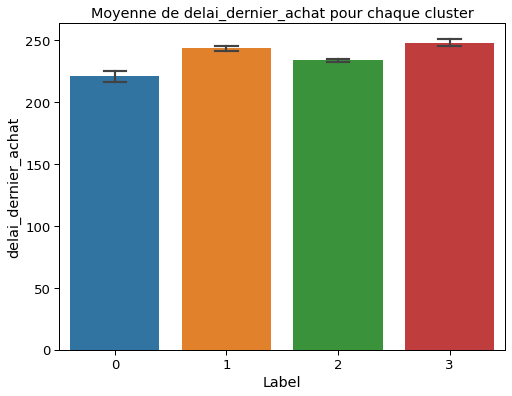

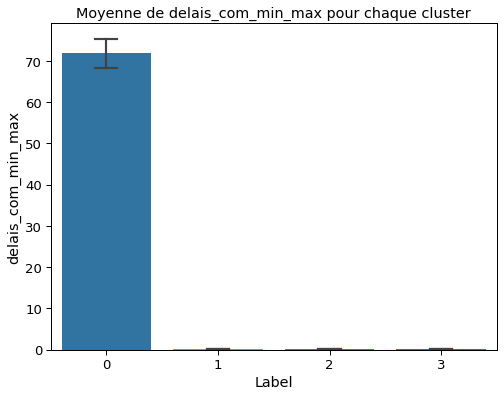

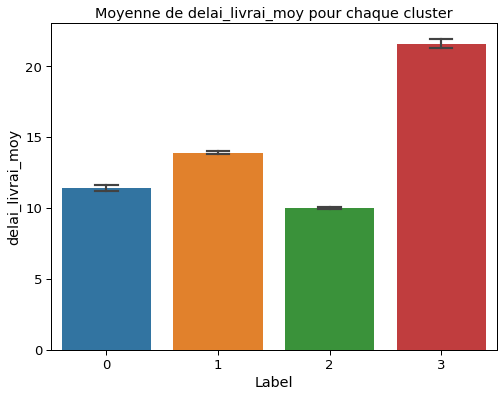

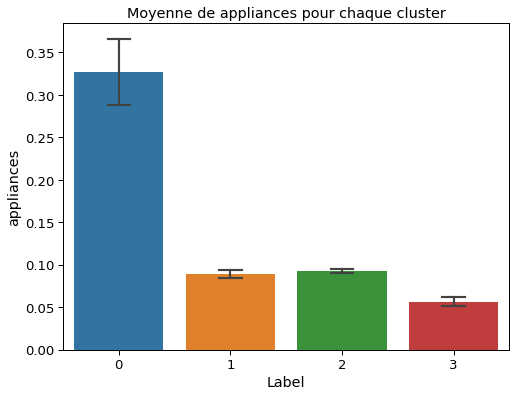

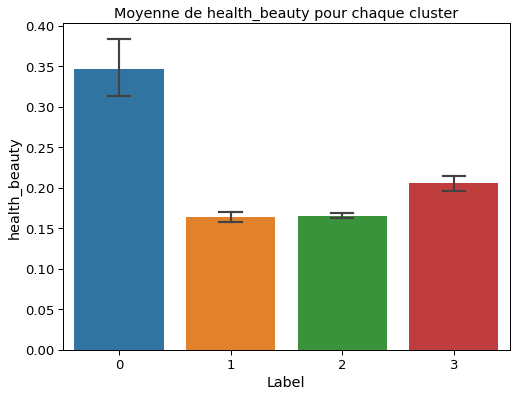

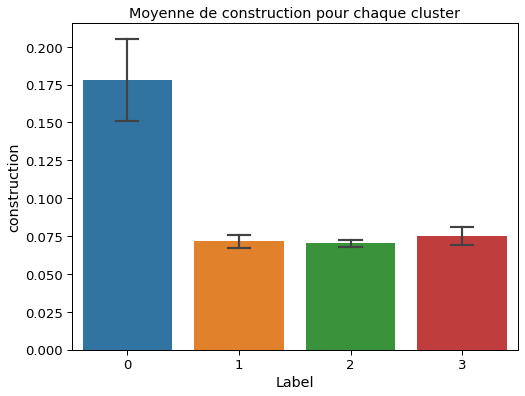

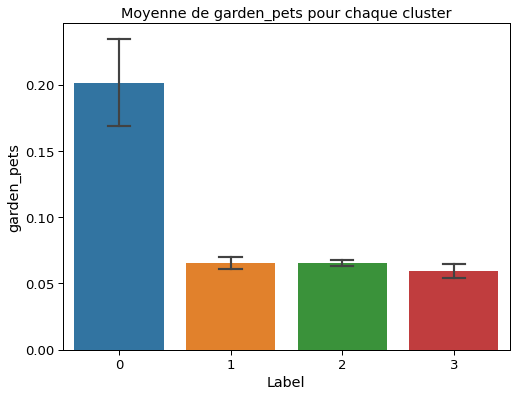

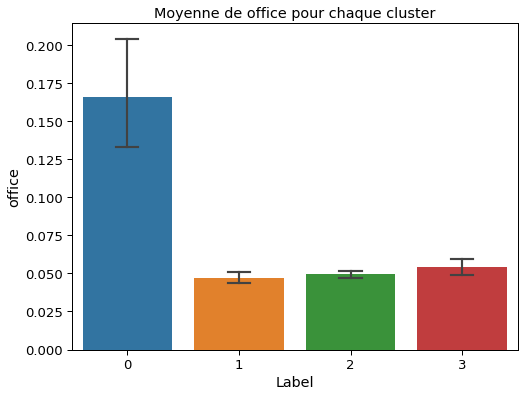

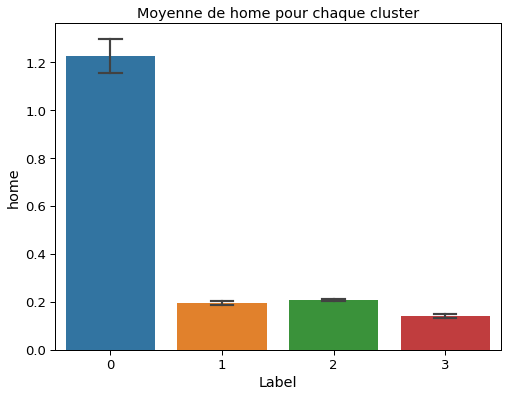

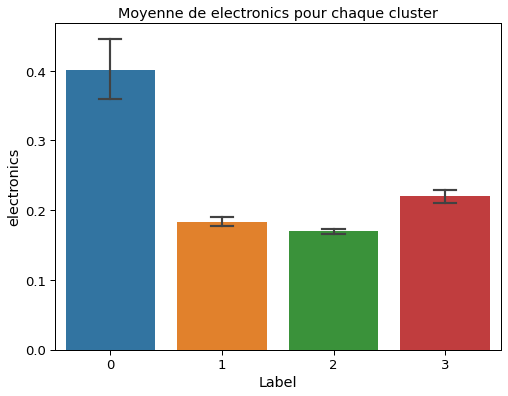

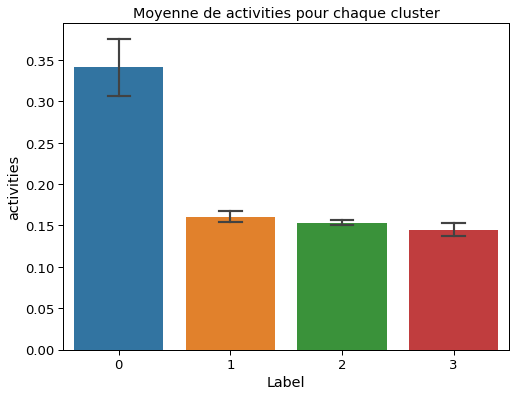

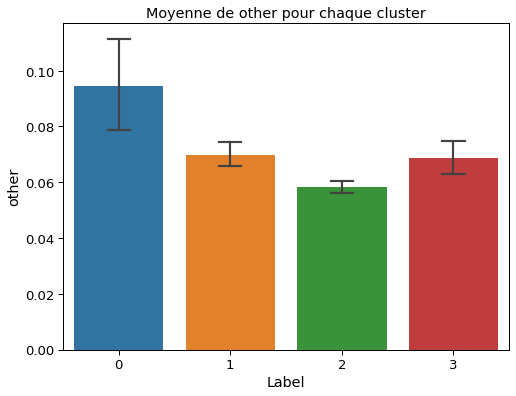

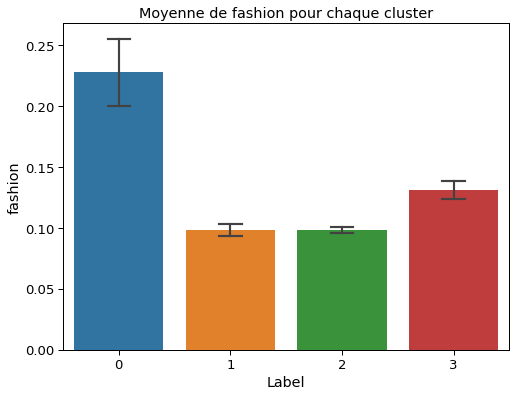

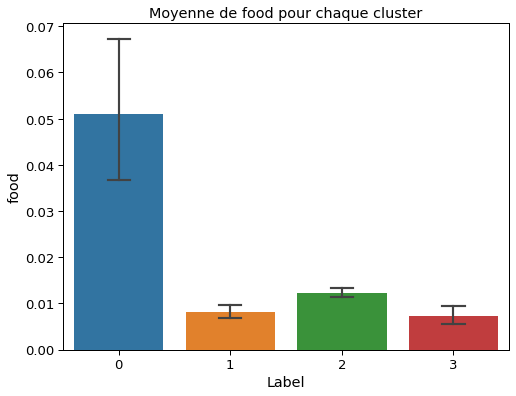

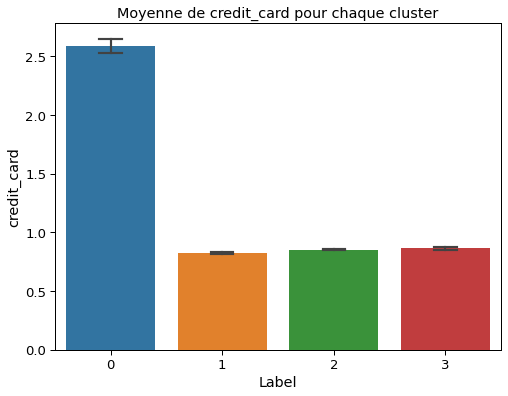

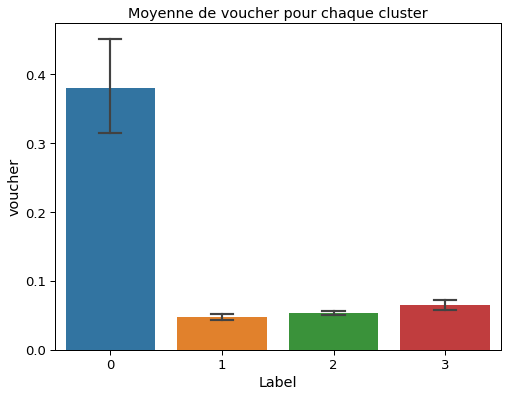

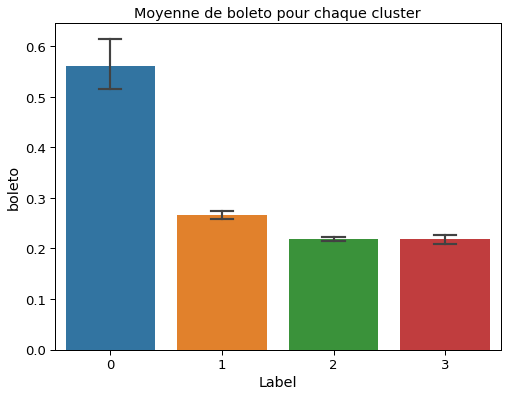

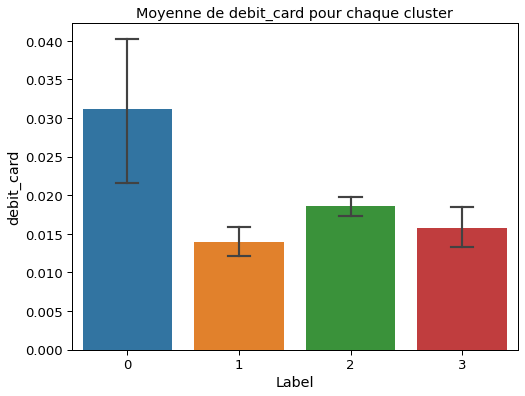

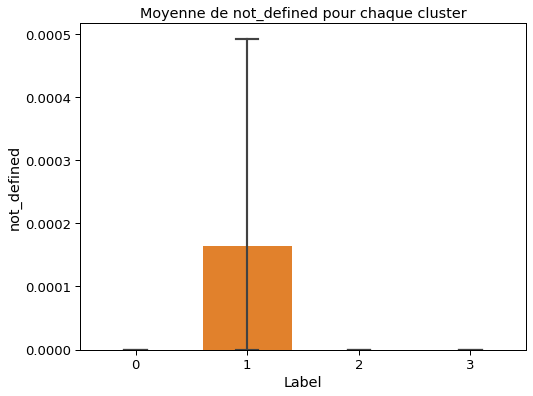

In [ ]:
for c in group_clu.columns:
  plt.figure(figsize=(8,6))
  titre = 'Moyenne de ' + str(c) + ' pour chaque cluster' 
  plt.title(titre)
  sns.barplot(x = 'Label',y = c,data = market_set,capsize=.2)

# Marketing 11 clusters

In [ ]:
kmeans_mark= KMeans(n_clusters=11,verbose=1,random_state=0,n_jobs=-1).fit(global_data_enc)
label_mark=kmeans_mark.predict(global_data_enc)

In [ ]:
market_set=global_data.copy()
market_set['Label']=label_mark
market_set=market_set.sort_values('Label')

In [ ]:
market_set

distance_cust_sell  ...  Label
customer_unique_id                                    ...       
edbc2c563c362f512885b9638445891c           11.395024  ...      0
c3ad54d23737424e27df79e49a86a673            4.392698  ...      0
d4cfcbffecd24af269cf47885448de53           10.131662  ...      0
9a5c4df1326945af470ac50fa853441b            3.920949  ...      0
0c303bd1eccb3d9bcda642c900a8e336            5.592835  ...      0
...                                              ...  ...    ...
43332d1b15ebe1dc139153cb9ed113da            8.258560  ...     10
43324275365c882796fc511ce01684c2            4.638426  ...     10
0e62dec3ea25f74db65111c58b17591a            3.573150  ...     10
eb2568a7ba9b2ca9bf1f818a8dea82ce            1.653832  ...     10
42f0fb0731358be76b7519f9970b0c96            3.655596  ...     10

[93318 rows x 32 columns]

### Nb de client par cluster

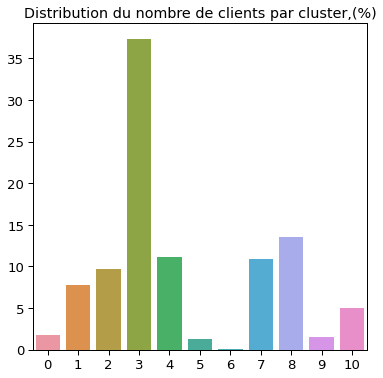

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Distribution du nombre de clients par cluster,(%)')
sns.barplot(x = market_set['Label'].value_counts().index, 
           y=market_set['Label'].value_counts().values/len(market_set)*100)

In [ ]:
market_set['Label'].value_counts()

3     34844
8     12668
4     10381
7     10110
2      9063
1      7282
10     4645
0      1676
9      1458
5      1190
6         1
Name: Label, dtype: int64

##Profils client

In [ ]:
group_clu = market_set.groupby('Label').mean()
group_clu=group_clu.drop(['zip_code','geo_customer_lat','geo_customer_lng'],axis=1)

In [ ]:
group_clu

distance_cust_sell  nb_com_moy  ...  debit_card  not_defined
Label                                  ...                         
0                4.856432    1.116945  ...    0.000597          0.0
1                4.135847    1.027465  ...    0.000000          0.0
2               17.292836    1.014785  ...    0.000000          0.0
3                3.386143    1.018511  ...    0.000000          0.0
4                3.907071    1.026780  ...    0.000000          0.0
5                5.124032    2.300000  ...    0.015126          0.0
6                5.119958    1.000000  ...    0.000000          3.0
7                3.775356    1.025223  ...    0.000000          0.0
8                7.371114    1.014998  ...    0.000000          0.0
9                4.922655    1.037037  ...    1.131687          0.0
10               4.702587    1.021313  ...    0.000000          0.0

[11 rows x 26 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

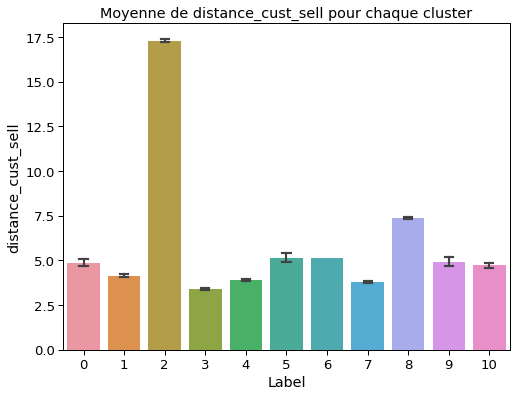

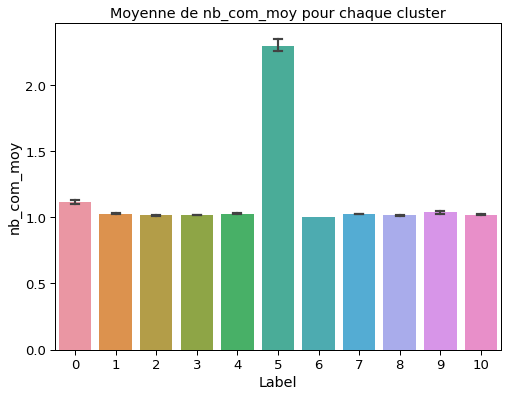

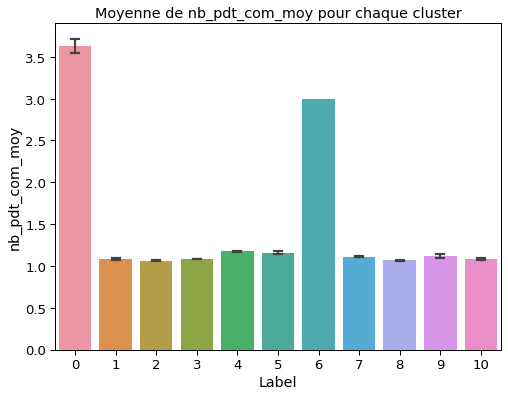

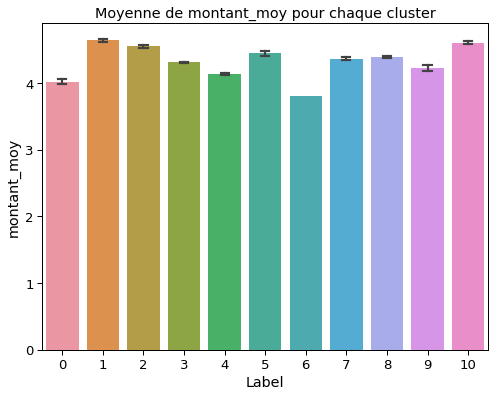

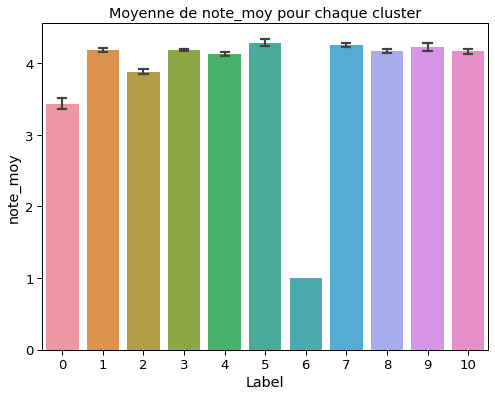

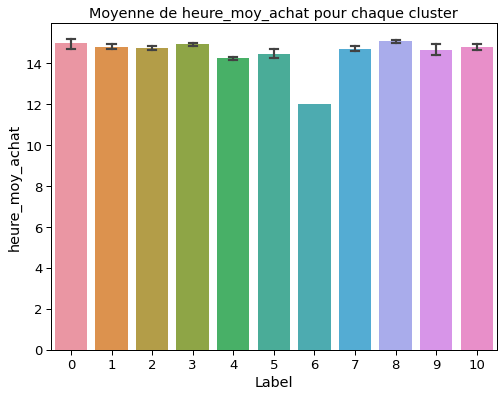

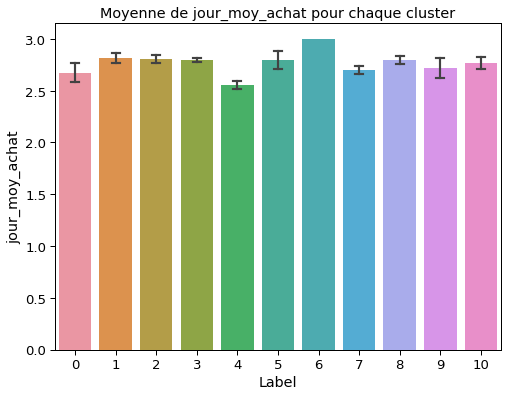

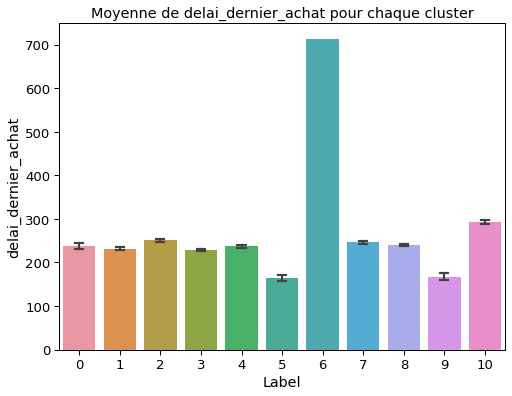

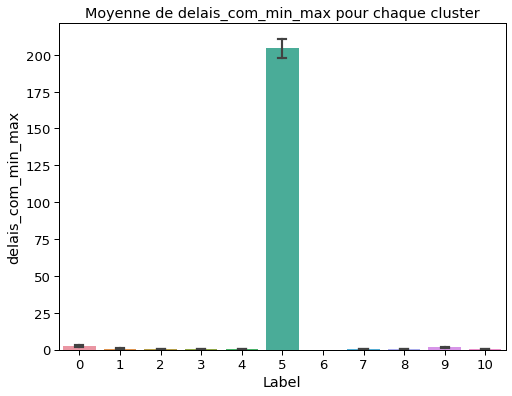

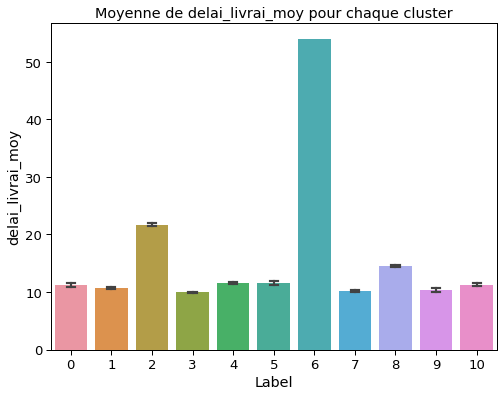

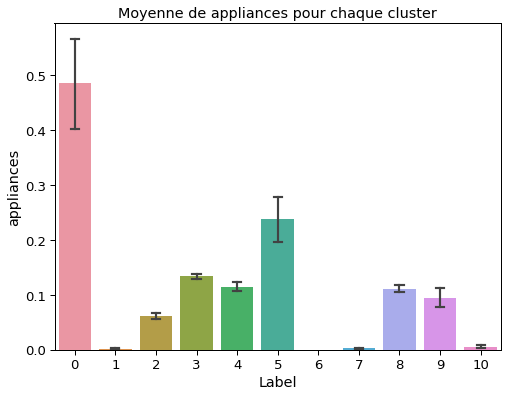

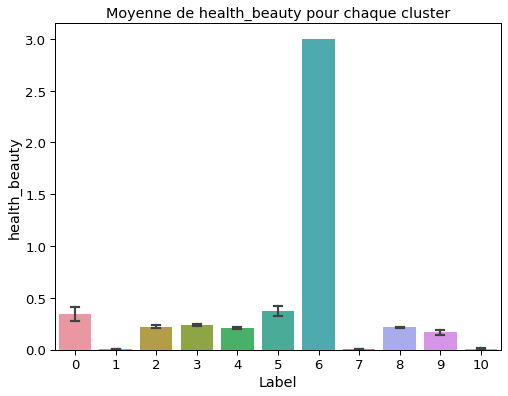

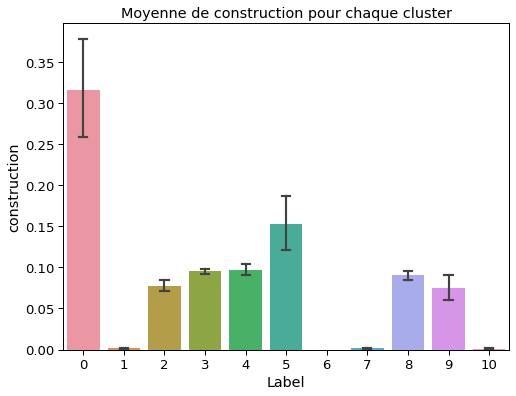

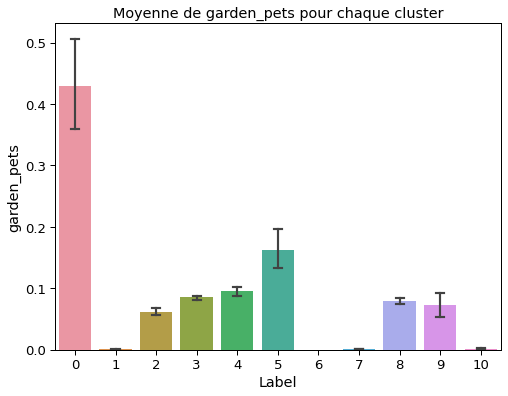

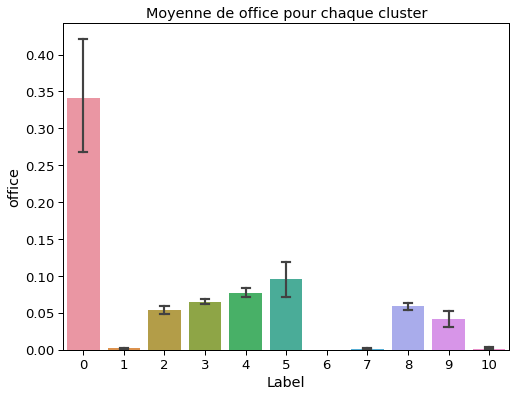

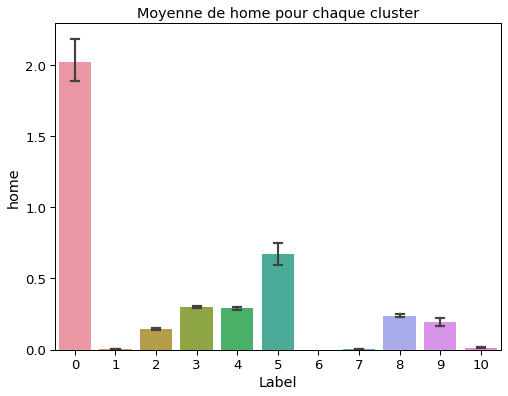

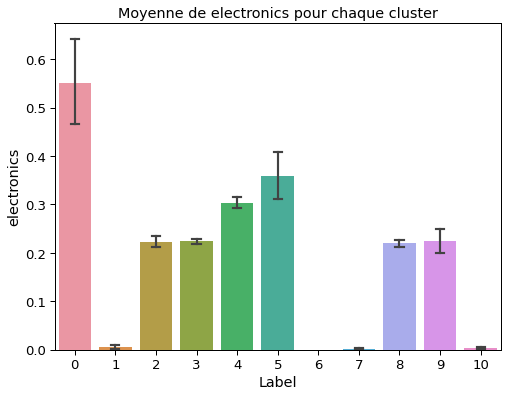

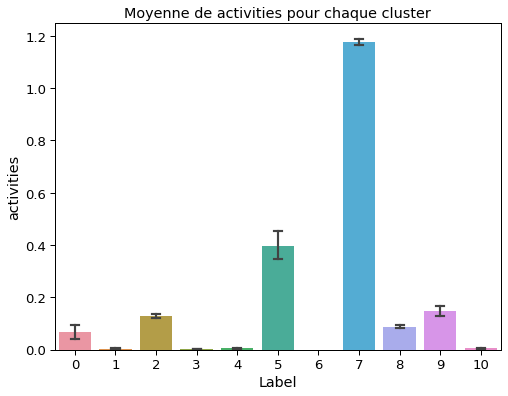

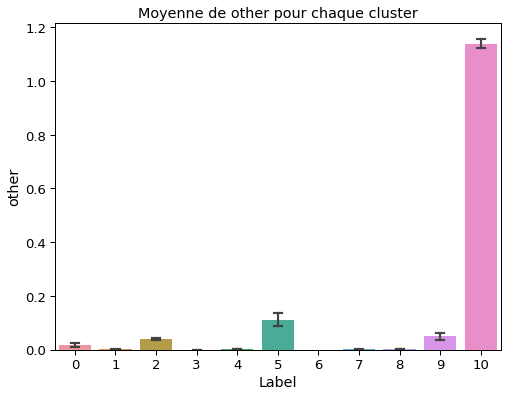

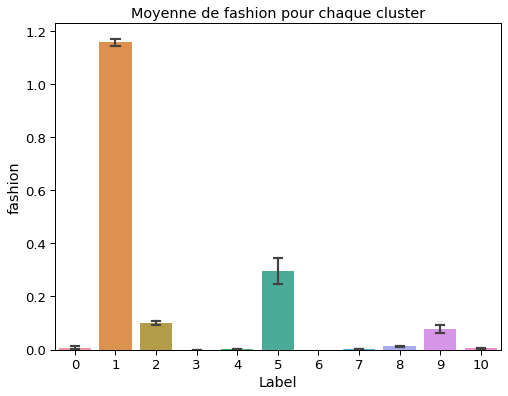

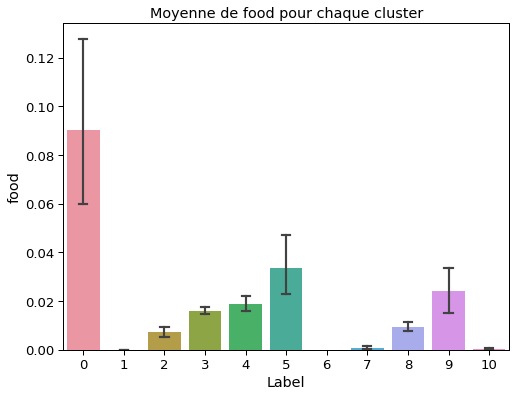

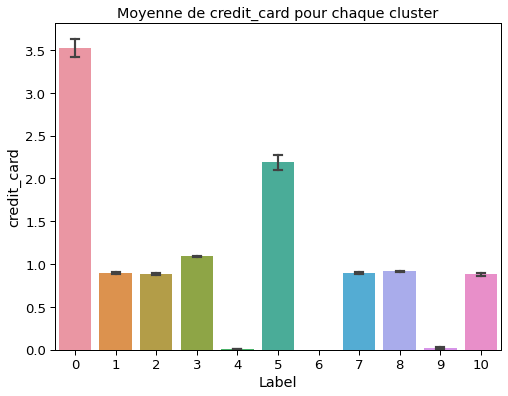

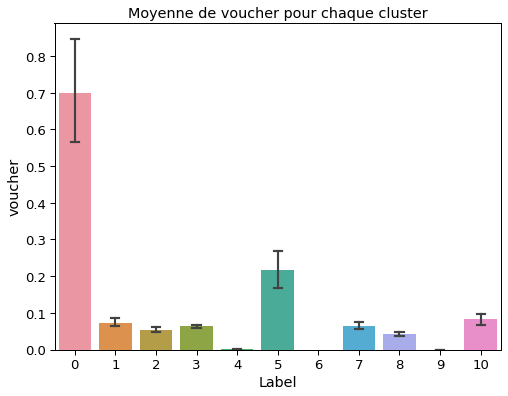

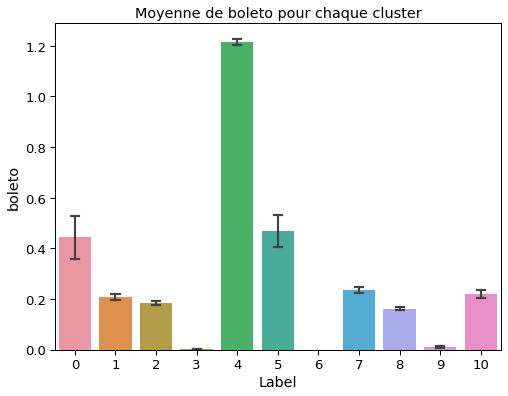

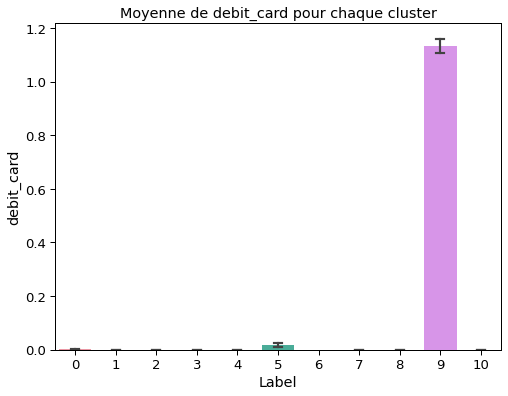

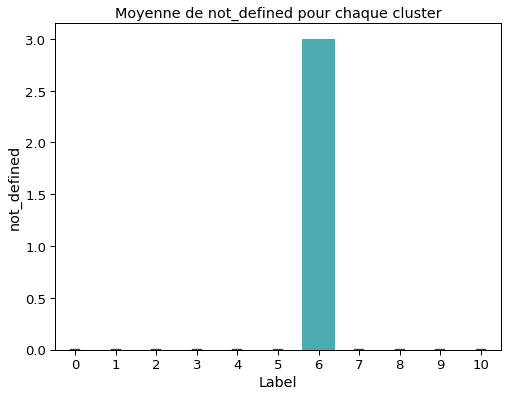

In [ ]:
for c in group_clu.columns:
  plt.figure(figsize=(8,6))
  titre = 'Moyenne de ' + str(c) + ' pour chaque cluster' 
  plt.title(titre)
  sns.barplot(x = 'Label',y = c,data = market_set,capsize=.2)